# Machine Learning Continued: Regression Analysis with Additional Variables

## In part 1 (Notebook 07) of machine learning, I focused on:

#### state's "reputation"  album average search score vs. state's overall google search score average  

## This notebook continues with additional variables:
#### album's state search average vs. week 1 album sales (0
#### state's album specific average score vs. week 1 album sales
#### song's "speechiness" vs. week 1 album sales

## Note: 
Outside of regression analysis, there are very strong correlations between categorical variables that will be explored further using other methods. These are particiularly import for insights relevant to the content of this analysis- songs, music, recording, and sales.

# Contents

## Import libraries and data

## Part 1: album's state search average vs. week 1 album sales 
#### 1A. Data cleaning: final_goog
#### 1B. Data prep for regression analysis
#### 1C. Regression analysis 
#### 1D. Performance improvement after removing outliers

## Part 2:  state's album specific average score vs. week 1 album sales
#### 2a. Data cleaning: final_goog (review relevant variables)
#### 2b. Data prep for regression analysis
#### 2c. Regression analysis 
#### 2d. Performance improvement after removing outliers

## Part 3: song's "speechiness" vs. week 1 album sales
#### 3a. Data cleaning: song_stream_album_final
   Note: within cleaning, identified major outliers for speechiness that are also 
   outliers for other variables. Need to remove 3 songs, as it might shift correlations etc.

## Part 4 (embedded)
#### Outlier removal (voice memos from 1989)
#### Update song info df
#### Recalculate album aggs and update album aggs df
#### Update google final df with relevant aggs
#### Rerun relevant correlations!

## Part 3 Continued- use alb_aggs dataframe
### Updating variables: "album speech_m and total album plays"
#### 3a. Review with new dataframe
#### 3b. Data prep for regression analysis
#### 3c. Regression analysis 
#### 3d. Performance improvement after removing outliers


## Observations

## Data export
Including updated outlier removals

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Show all graphs within cells

%matplotlib inline

In [3]:
path = r"C:\Users\leobs\OneDrive\Desktop\LF_TS_Analysis"

In [4]:
# Import google dataframe for state and album search score relationships

df_g= pd.read_csv(os.path.join(path, '02 Manipulated Data', 'final_goog.csv'), index_col=0)

In [5]:
# Import song info dataframe for song characteristics (speechiness) relationship

df_s = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'song_stream_alb_final.csv'), index_col=0)

In [6]:
# Import song aggs dataframe for outlier updates

df_s_aggs = pd.read_csv(os.path.join(path, '02 Manipulated Data', 'alb_aggs.csv'), index_col=0)

# Part 1: album's state search average vs. week 1 album sales 

## 1A. Data cleaning: final_goog

In [7]:
df_g.head(20)

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
5,Colorado,7,Debut,DEBUT,2006-10-24,-2,69,1,original,6,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
6,Connecticut,0,Debut,DEBUT,2006-10-24,-2,69,1,original,7,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
7,Delaware,0,Debut,DEBUT,2006-10-24,-2,69,1,original,8,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
8,District of Columbia,0,Debut,DEBUT,2006-10-24,-2,69,1,original,9,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
9,Florida,6,Debut,DEBUT,2006-10-24,-2,69,1,original,10,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both


In [8]:
df_g.shape

(3672, 92)

In [9]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3671
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3672 non-null   object 
 1   g_search_score              3672 non-null   int64  
 2   album_event                 3672 non-null   object 
 3   album_id                    3672 non-null   object 
 4   album_release_date          3672 non-null   object 
 5   periods_from_release        3672 non-null   int64  
 6   us_search_avg               3672 non-null   int64  
 7   alb_num_x                   3672 non-null   int64  
 8   tv                          3672 non-null   object 
 9   state_num                   3672 non-null   int64  
 10  alb_group_st_search_avg     3672 non-null   int64  
 11  st_overall_search_avg       3672 non-null   int64  
 12  st_group_alb_search_avg     3672 non-null   int64  
 13  tvflag                      3672 non-n

In [10]:
df_g.columns

Index(['state', 'g_search_score', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_norm', 'pop_

In [11]:
df_g.head()

,state,g_search_score,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,0.576,0.672,0.0,0.128,-4.931,0.0293,115.028,0.428,213053.0,both


In [12]:
# rename columns for clarity

df_g.rename(columns = {'w1_trad_album_sales': 'wk1_sales',
                       'g_search_score':'st_search_score_period_alb', 
                      }
                      , inplace=True)

In [13]:
df_g.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

#### Data types

In [14]:
# Check data types for relevant variables

df_g['wk1_sales'].dtype

dtype('float64')

In [15]:
# Check data types for revant variables

df_g['alb_group_st_search_avg'].dtype

dtype('int64')

In [16]:
# Convert album group average score to float

df_g['alb_group_st_search_avg'] = df_g['alb_group_st_search_avg'].astype(float)

In [17]:
df_g['alb_group_st_search_avg'].dtype

dtype('float64')

In [18]:
# Check data types for revant variables

df_g['st_group_alb_search_avg'].dtype

dtype('int64')

In [19]:
# Convert state group average score to float- will use for part 2

df_g['st_group_alb_search_avg'] = df_g['st_group_alb_search_avg'].astype(float)

In [20]:
df_g['st_group_alb_search_avg'].dtype

dtype('float64')

### Missing values

In [21]:
# Check for missing values

df_g.isnull().sum()

# None found

state                         0
st_search_score_period_alb    0
album_event                   0
album_id                      0
album_release_date            0
                             ..
speech_m                      0
temp_m                        0
val_m                         0
dur_m                         0
_merge                        0
Length: 92, dtype: int64

### Duplicates

In [22]:
df_g_dups = df_g.duplicated()

In [23]:
df_g_dups.shape # no dups

(3672,)

In [24]:
df_g.columns # can delete after run

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

## Create a color dictionary for album_ids

In [25]:
color_dict = {"DEBUT": 'mediumseagreen', "FEAR": 'goldenrod', "SPEAK":'mediumpurple', "RED": 'crimson', "1989": 'skyblue', "REP": 'k', "LOVE": 'orchid', "FOLK": 'grey', "EVER": 'chocolate', "FEARTV": 'darkgoldenrod', "REDTV": 'firebrick', "MIDN": 'darkblue', "SPEAKTV": 'indigo', "1989TV": 'steelblue'}

In [26]:
df_g['color'] = df_g['album_id'].map(color_dict)

In [27]:
df_g['color'].value_counts(dropna=False)

color
darkblue          408
mediumseagreen    255
mediumpurple      255
skyblue           255
k                 255
indigo            255
chocolate         255
darkgoldenrod     255
grey              255
orchid            255
firebrick         255
crimson           255
goldenrod         255
steelblue         204
Name: count, dtype: int64

### Extreme values checks

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\3339576286.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_g['wk1_sales'], kde=True, bins=25)


<Axes: xlabel='wk1_sales', ylabel='Density'>

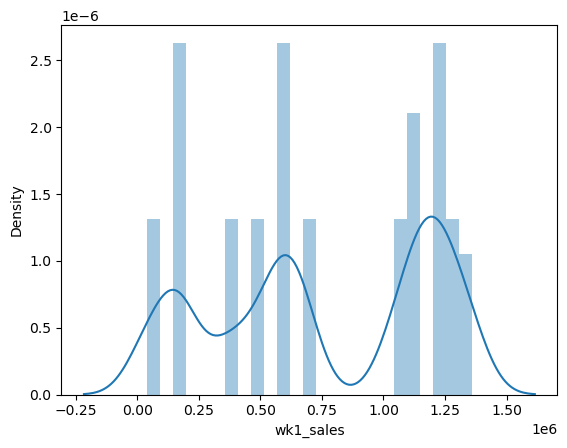

In [28]:
sns.distplot(df_g['wk1_sales'], kde=True, bins=25)  

Observations: While there does appear to be clusters, all of the album information is important and therefore I do not want to remove.

In [29]:
df_g['wk1_sales'].value_counts(dropna=False)

wk1_sales
1140000.0    408
39000.0      255
1047000.0    255
1297000.0    255
1216000.0    255
507000.0     255
154500.0     255
179000.0     255
615000.0     255
679000.0     255
369000.0     255
1208000.0    255
592300.0     255
1359000.0    204
Name: count, dtype: int64

In [30]:
df_g['wk1_sales'].mean() # Check the mean

750972.2222222222

In [31]:
df_g['wk1_sales'].median() # Check the median

679000.0

In [32]:
df_g['wk1_sales'].max() # Check the max

1359000.0

In [33]:
df_g['wk1_sales'].min() # Check the min

39000.0

## Check for extreme values for album search score averages

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\1201849764.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_g['alb_group_st_search_avg'], kde=True, bins=25)


<Axes: xlabel='alb_group_st_search_avg', ylabel='Density'>

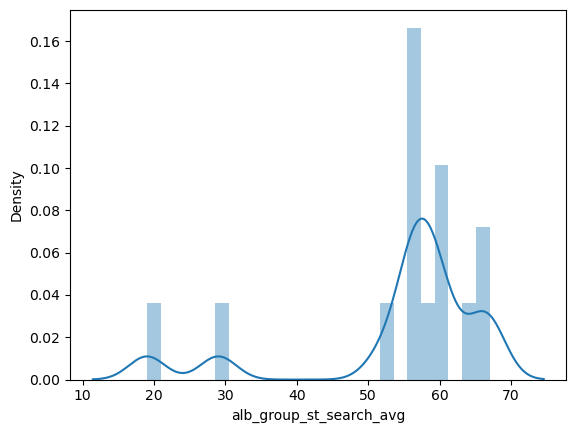

In [34]:
sns.distplot(df_g['alb_group_st_search_avg'], kde=True, bins=25)  

There are two outliers. Will run through process with for first rendition, then will update model without bottom two figures.

##  1B.Data prep for regression analysis

### Variables: album's state search average vs. week 1 album sales

This is grouping search scores to be within each album, showing album specific averages vs. scores across states. It does not delineate across states.

In [35]:
df_g.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

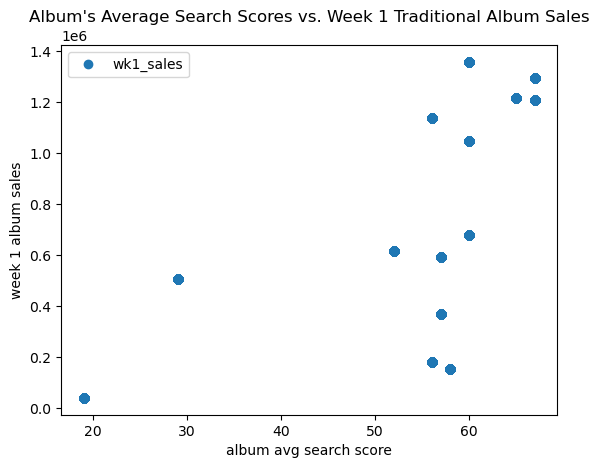

In [36]:
# Create a scatterplot using matplotlib to review variables comparing
goog_alb_scat = plt
df_g.plot(x = 'alb_group_st_search_avg', y='wk1_sales',style='o') 
goog_alb_scat.title("Album's Average Search Scores vs. Week 1 Traditional Album Sales")  
goog_alb_scat.xlabel("album avg search score")  
goog_alb_scat.ylabel("week 1 album sales")  
goog_alb_scat.show()

In [37]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_g['alb_group_st_search_avg'].values.reshape(-1,1)
y = df_g['wk1_sales'].values.reshape(-1,1)

In [38]:
X

array([[19.],
       [19.],
       [19.],
       ...,
       [57.],
       [57.],
       [57.]])

In [39]:
y

array([[ 39000.],
       [ 39000.],
       [ 39000.],
       ...,
       [592300.],
       [592300.],
       [592300.]])

In [40]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 1C. Regression analysis 

In [41]:
# Create a regression object.

regression = LinearRegression() 

In [42]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [43]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

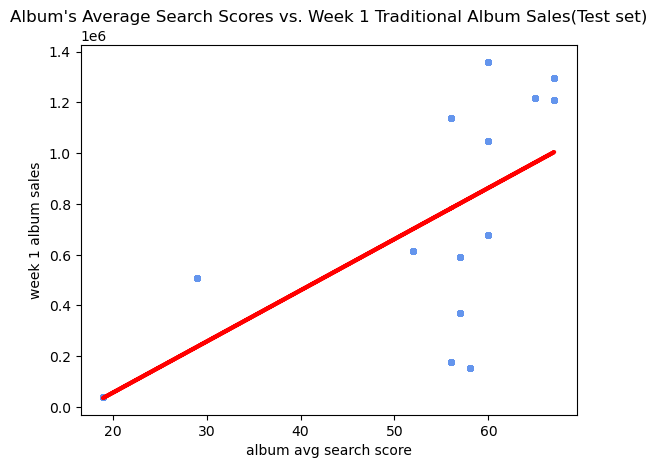

In [44]:
# Create a plot that shows the regression line from the model on the test set.

goog_alb_plot_test = plt
goog_alb_plot_test.scatter(X_test, y_test, color='cornflowerblue', s = 15)
goog_alb_plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
goog_alb_plot_test.title("Album's Average Search Scores vs. Week 1 Traditional Album Sales(Test set)")
goog_alb_plot_test.xlabel('album avg search score')
goog_alb_plot_test.ylabel('week 1 album sales')
goog_alb_plot_test.show()

In [45]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [46]:
# Print the model summary statistics to evaluate model performance

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[20171.37481449]]
Mean squared error:  125218361933.8166
R2 score:  0.37070328764131866


Observations: The r2 scores shows that only about 37% of the linear regression model can be explained in variance. So far this is not a good fit.

In [47]:
y_predicted

array([[ 782102.46250417],
       [  35761.59436819],
       [ 802273.83731866],
       ...,
       [ 963644.83583455],
       [1003987.58546352],
       [ 782102.46250417]])

In [48]:
# Set the float_format option to prevent scientific notation

pd.options.display.float_format = '{:.2f}'.format

In [49]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1140000.00,782102.46
1,39000.00,35761.59
2,592300.00,802273.84
3,369000.00,802273.84
4,369000.00,802273.84
5,179000.00,782102.46
6,1297000.00,1003987.59
7,1216000.00,963644.84
8,1216000.00,963644.84
9,1208000.00,1003987.59


Observations: The predicted values have quite a large difference relative to the range of values. 

## 1D. Performance improvement after removing outliers

Outliers lie within album search score. First I want to check for outliers by album. Then I want to explore if certain states being removed can help.

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\2140460376.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  alb_group_search_avg_distplot= sns.distplot(df_g['alb_group_st_search_avg'], kde=True,  bins=25)


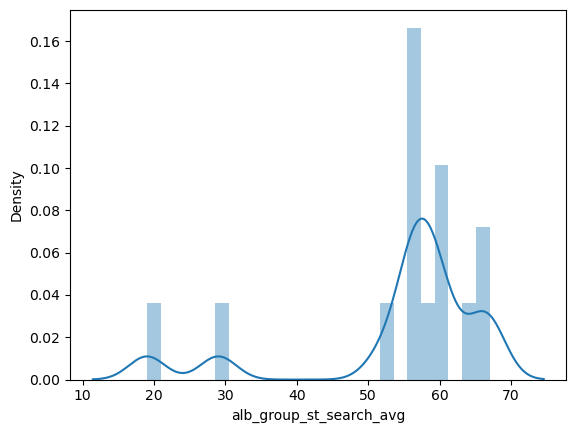

In [50]:
alb_group_search_avg_distplot= sns.distplot(df_g['alb_group_st_search_avg'], kde=True,  bins=25) 

In [51]:
# Examine crosstab values
alb_group_crosstab = pd.crosstab(df_g.alb_group_st_search_avg, df_g.album_id, normalize='index')

In [52]:
alb_group_crosstab

album_id,1989,1989TV,DEBUT,EVER,FEAR,FEARTV,FOLK,LOVE,MIDN,RED,REDTV,REP,SPEAK,SPEAKTV
alb_group_st_search_avg,,,,,,,,,,,,,,
19.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
29.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
52.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
56.00,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.00,0.62,0.00,0.00,0.00,0.00,0.00
57.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00
58.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
60.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.36,0.00,0.00,0.00,0.00,0.36,0.00
65.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
67.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.00,0.00,0.00,0.00


###### Colors for albums (in alpha order)

color_dict = {"DEBUT": 'mediumseagreen', "FEAR": 'goldenrod', "SPEAK":'mediumpurple', "RED": 'crimson', "1989": 'skyblue', "REP": 'k', "LOVE": 'orchid', "FOLK": 'grey', "EVER": 'chocolate', "FEARTV": 'darkgoldenrod', "REDTV": 'firebrick', "MIDN": 'darkblue', "SPEAKTV": 'indigo', "1989TV": 'steelblue'}

'skyblue', 'steelblue', 'mediumseagreen', 'chocolate', 'goldenrod', 'darkgoldenrod', 'grey', 'orchid', 'darkblue', 'crimson', 'firebrick', 'k', 'mediumpurple', 'indigo'

In [53]:
color = ['skyblue', 'steelblue', 'mediumseagreen', 'chocolate', 'goldenrod', 'darkgoldenrod', 'grey', 'orchid', 'darkblue', 'crimson', 'firebrick', 'k', 'mediumpurple', 'indigo']

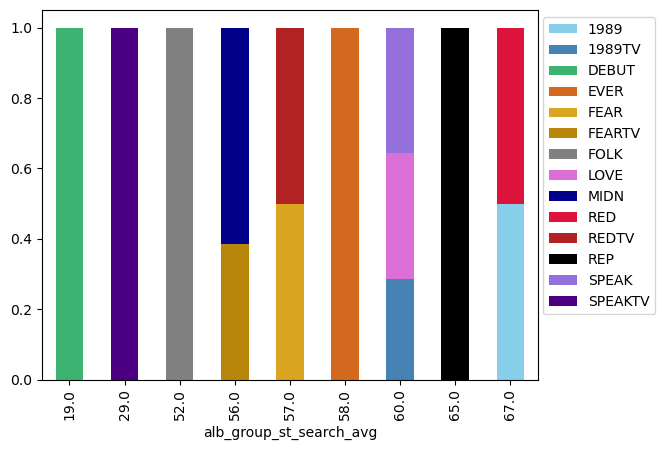

In [54]:
# Examine crosstab values in stacked bar

alb_group_search_avg_by_alb_stacked_bar = pd.crosstab(df_g.alb_group_st_search_avg, df_g.album_id, normalize='index').plot.bar(stacked= True, color=color)
alb_group_search_avg_by_alb_stacked_bar.legend(loc='upper right', bbox_to_anchor=(1.25, 1))

This figure clearly shows that DEBUT and SPEAKTV are outliers for search averages on the low end, and that 1989 and RED are outliers on the upper end. 

In [55]:
# Export figure

alb_group_search_avg_by_alb_stacked_bar.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_group_search_avg_by_alb_stacked_bar.png'))

In [56]:
# Find interquartile ranges to set parameters

q1 = df_g['alb_group_st_search_avg'].quantile(0.25)
q3 = df_g['alb_group_st_search_avg'].quantile(0.75)
iqr = q3 - q1

# Display the results
print(f"Q1: {q1}")
print(f"Q3: {q3}")
print(f"IQR: {iqr}")

Q1: 56.0
Q3: 60.0
IQR: 4.0


In [57]:
low_out = 56.0-(1.5*4.0)
print(low_out)

50.0


Both Debut and SpeakTV are outliers. Prior to removal, I want to see if particular states skew their data

In [58]:
df_g.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

In [59]:
st_score_review= df_g.groupby('state')['st_search_score_period_alb'].mean().reset_index()

In [60]:
st_score_review = st_score_review.sort_values(by='st_search_score_period_alb', ascending=False)

In [61]:
st_score_review

,state,st_search_score_period_alb
39,Rhode Island,79.33
44,Utah,71.60
21,Massachusetts,70.88
8,District of Columbia,68.96
29,New Hampshire,67.54
6,Connecticut,63.67
38,Pennsylvania,63.54
19,Maine,62.68
27,Nebraska,62.60
42,Tennessee,62.24


In [62]:
DEBUT_SPEAKTV_st_scores = df_g.loc[df_g['album_id'].isin(["DEBUT", "SPEAKTV"])]

In [63]:
DEBUT_SPEAKTV_st_scores.head()

,state,st_search_score_period_alb,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge,color
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen


In [64]:
DEBUT_SPEAKTV_st_scores['album_id'].value_counts(dropna=False)

album_id
DEBUT      255
SPEAKTV    255
Name: count, dtype: int64

In [65]:
low_alb_st_scores= DEBUT_SPEAKTV_st_scores.groupby('state')['st_search_score_period_alb'].mean().reset_index()

In [66]:
low_alb_st_scores = low_alb_st_scores.sort_values(by='st_search_score_period_alb', ascending=False)

In [67]:
low_alb_st_scores

,state,st_search_score_period_alb
23,Minnesota,39.10
35,Ohio,38.60
34,North Dakota,35.70
27,Nebraska,35.20
48,West Virginia,34.30
17,Kentucky,34.20
39,Rhode Island,33.50
38,Pennsylvania,31.50
16,Kansas,31.00
42,Tennessee,30.90


Observations: The lower averages for DEBUT and FEARTV don't seem to be due to just a few states. All states have much lower scores for these albums. Therefore it does not make sense to remove certain states (vs. albums)

In [68]:
df_g.shape

(3672, 93)

In [69]:
# Clean the extreme values by using quartile scores (which also will exclude DEBUT and FEARTV)

df_g_test_out_remove = df_g[(df_g['alb_group_st_search_avg'] >=50.00)]

In [70]:
df_g_test_out_remove.shape

(3162, 93)

In [71]:
df_g_test_out_remove['alb_group_st_search_avg'].value_counts

<bound method IndexOpsMixin.value_counts of 255    60.00
256    60.00
257    60.00
258    60.00
259    60.00
        ... 
3667   57.00
3668   57.00
3669   57.00
3670   57.00
3671   57.00
Name: alb_group_st_search_avg, Length: 3162, dtype: float64>

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\4027254692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g_test_out_remove_distplot = sns.distplot(df_g_test_out_remove['alb_group_st_search_avg'], kde=True,  bins=25)


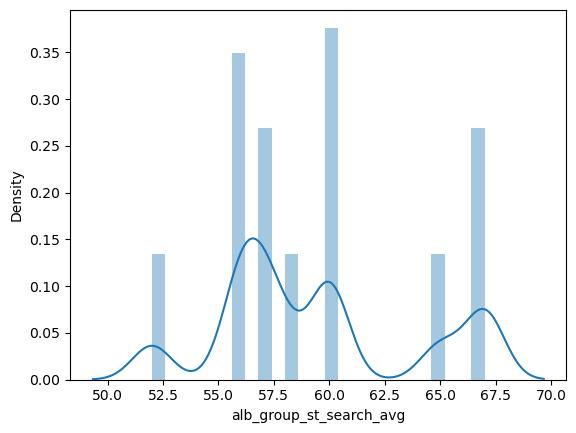

In [72]:
g_test_out_remove_distplot = sns.distplot(df_g_test_out_remove['alb_group_st_search_avg'], kde=True,  bins=25)  

In [73]:
df_g_test_out_remove.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

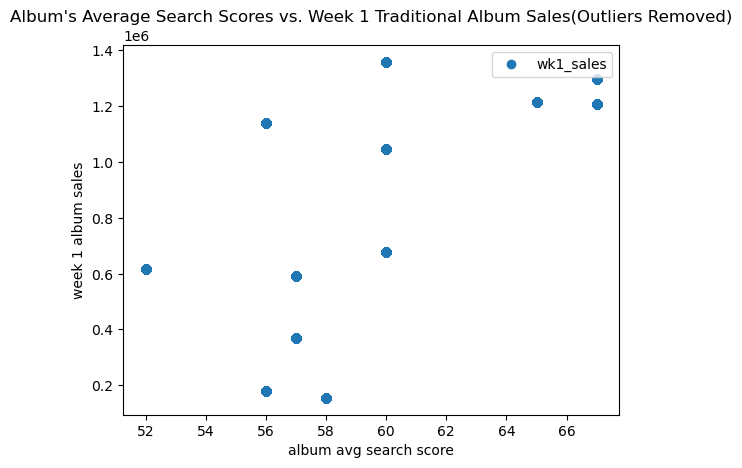

In [74]:
# See how the scatterplot looks without outliers.
g_test_out_remove=plt
df_g_test_out_remove.plot(x = 'alb_group_st_search_avg', y='wk1_sales', style='o')  
g_test_out_remove.title("Album's Average Search Scores vs. Week 1 Traditional Album Sales(Outliers Removed)")  
g_test_out_remove.xlabel('album avg search score')  
g_test_out_remove.ylabel('week 1 album sales')  
g_test_out_remove.show()

In [75]:
# Reshape again.

X_2 = df_g_test_out_remove['alb_group_st_search_avg'].values.reshape(-1,1)
y_2 = df_g_test_out_remove['wk1_sales'].values.reshape(-1,1)

In [76]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [77]:
# Run and fit the regression.

regression_2 = LinearRegression()  
regression_2.fit(X_train_2, y_train_2)

LinearRegression()

In [78]:
# Predict.

y_predicted_2 = regression_2.predict(X_test_2)

In [79]:
rmse_2 = mean_squared_error(y_test_2, y_predicted_2)
r2_2 = r2_score(y_test_2, y_predicted_2)

In [80]:
print('Slope:' ,regression_2.coef_)
print('Mean squared error: ', rmse_2)
print('R2 score: ', r2_2)

Slope: [[55082.19711124]]
Mean squared error:  111290009895.1517
R2 score:  0.3560422832538668


Observations: While this changed the slope, the R2 score got worse. 

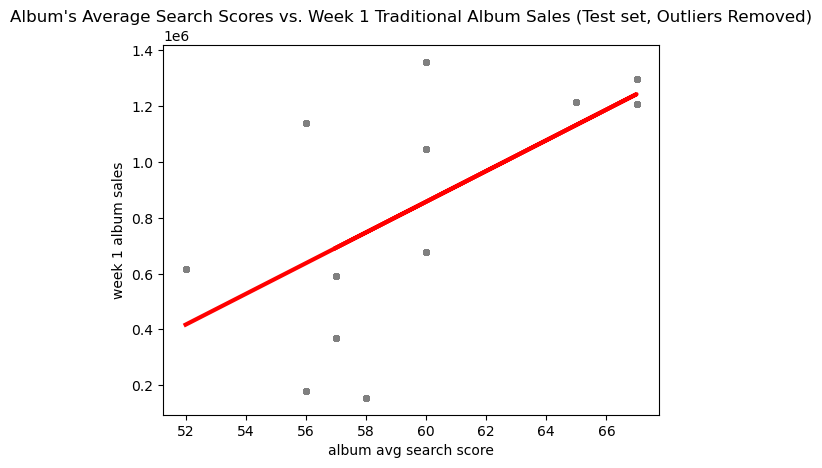

In [81]:
# Visualizing the test set results.
g_test_plot_2 = plt
g_test_plot_2.scatter(X_test_2, y_test_2, color='gray', s = 15)
g_test_plot_2.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
g_test_plot_2.title("Album's Average Search Scores vs. Week 1 Traditional Album Sales (Test set, Outliers Removed)")
g_test_plot_2.xlabel('album avg search score')
g_test_plot_2.ylabel('week 1 album sales')
g_test_plot_2.show()

In [82]:
data2 = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data2.head(30)

,Actual,Predicted
0,369000.00,692541.40
1,369000.00,692541.40
2,1359000.00,857787.99
3,1208000.00,1243363.37
4,154500.00,747623.59
5,154500.00,747623.59
6,592300.00,692541.40
7,1359000.00,857787.99
8,1216000.00,1133198.97
9,679000.00,857787.99


Observations: Choice to use original model, without outliers removed. This is both because the performance improvements failed and because including all albums is valuable data. 

# Part 2: state's album specific average score vs. week 1 album sales

## 2a. Data cleaning: final_goog (review relevant variables)
Already completed data cleaning from part 1. Already looked for distribution and outliers with the y variable, week1_sales. Will quickly review and check for outliers with x-variable

In [83]:
df_g.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\1790472034.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  st_group_alb_search_avg_distplot = sns.distplot(df_g['st_group_alb_search_avg'], bins=25)


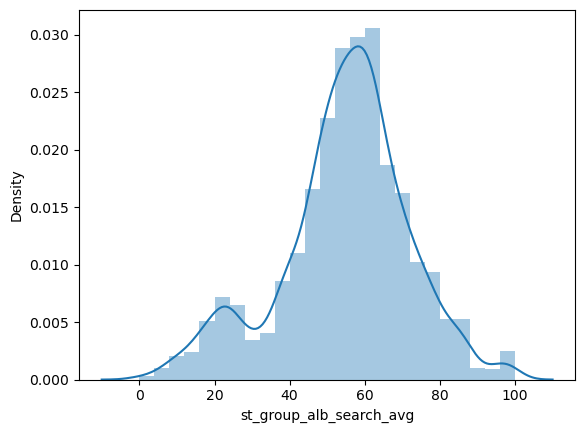

In [84]:
st_group_alb_search_avg_distplot = sns.distplot(df_g['st_group_alb_search_avg'], bins=25)  

Observations: There is a fairly even density distribution here. There are potential outliers close to 100 and below 20.

In [85]:
df_g['st_group_alb_search_avg'].describe()

count   3672.00
mean      54.59
std       17.30
min        0.00
25%       46.00
50%       56.00
75%       65.00
max      100.00
Name: st_group_alb_search_avg, dtype: float64

## 2b.Data prep for regression analysis

### Variables: state's album search average vs. week 1 album sales

This is essentially using states as groups, but calculating the averages based on each album period rather than across all albums

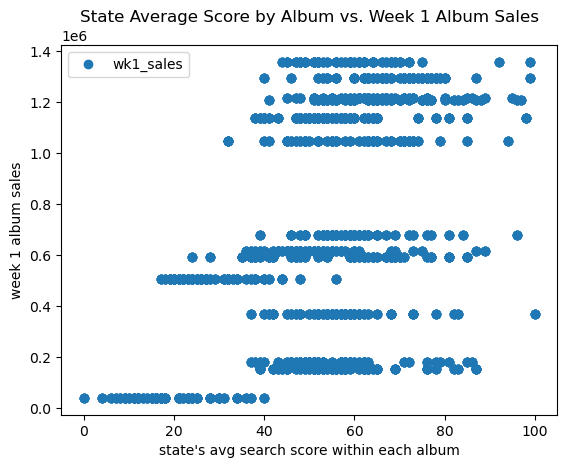

In [86]:
# Create a scatterplot using matplotlib to review variables comparing
goog_st_avg_wk1_sales_scat = plt
df_g.plot(x = 'st_group_alb_search_avg', y='wk1_sales',style='o') 
goog_st_avg_wk1_sales_scat.title("State Average Score by Album vs. Week 1 Album Sales")  
goog_st_avg_wk1_sales_scat.xlabel("state's avg search score within each album")  
goog_st_avg_wk1_sales_scat.ylabel("week 1 album sales")  
goog_st_avg_wk1_sales_scat.show()

In [87]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_3 = df_g['st_group_alb_search_avg'].values.reshape(-1,1)
y_3 = df_g['wk1_sales'].values.reshape(-1,1)

In [88]:
X_3

array([[21.],
       [16.],
       [15.],
       ...,
       [81.],
       [69.],
       [54.]])

In [89]:
y_3

array([[ 39000.],
       [ 39000.],
       [ 39000.],
       ...,
       [592300.],
       [592300.],
       [592300.]])

In [90]:
# Split data into a training set and a test set.

X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size=0.3, random_state=0)

## 2c. Regression analysis 

In [91]:
# Create a regression object.

regression_3 = LinearRegression() 

In [92]:
# Fit the regression object onto the training set.

regression_3.fit(X_3_train, y_3_train)

LinearRegression()

In [93]:
# Predict the values of y using X.

y_3_predicted = regression_3.predict(X_3_test)

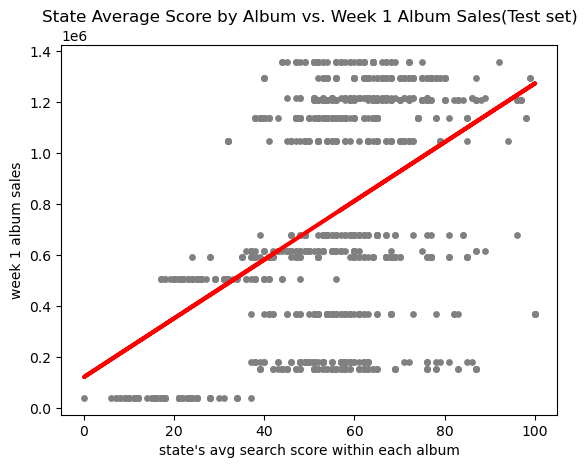

In [94]:
# Create a plot that shows the regression line from the model on the test set.
st_avg_wk1_sales_plot_test = plt

st_avg_wk1_sales_plot_test.scatter(X_3_test, y_3_test, color='gray', s = 15)
st_avg_wk1_sales_plot_test.plot(X_3_test, y_3_predicted, color='red', linewidth =3)
st_avg_wk1_sales_plot_test.title("State Average Score by Album vs. Week 1 Album Sales(Test set)")
st_avg_wk1_sales_plot_test.xlabel("state's avg search score within each album")
st_avg_wk1_sales_plot_test.ylabel("week 1 album sales")
st_avg_wk1_sales_plot_test.show()

In [95]:
# Create objects that contain the model summary statistics.

rmse_3 = mean_squared_error(y_3_test, y_3_predicted) 
r2_3 = r2_score(y_3_test, y_3_predicted) 

In [96]:
# Print the model summary statistics to evaluate model performance

print('Slope:' ,regression_3.coef_)
print('Mean squared error: ', rmse_3)
print('R2 score: ', r2_3)

Slope: [[11533.66175382]]
Mean squared error:  157675115026.21802
R2 score:  0.20758880746882502


Observations: This is a low R2 score and a linear model is not a good fit. 

## Compare how regression fits the training set

In [97]:
y_3_predicted

array([[ 616949.31370497],
       [ 386276.07862856],
       [1101363.10736543],
       ...,
       [ 824555.22527374],
       [ 859156.2105352 ],
       [ 778420.57825846]])

In [98]:
# Create a dataframe comparing the actual and predicted values of y.

data3 = pd.DataFrame({'Actual': y_3_test.flatten(), 'Predicted': y_3_predicted.flatten()})
data3.head(30)

,Actual,Predicted
0,1140000.00,616949.31
1,39000.00,386276.08
2,592300.00,1101363.11
3,369000.00,801487.90
4,369000.00,605415.65
5,179000.00,686151.28
6,1297000.00,1009093.81
7,1216000.00,962959.17
8,1216000.00,870689.87
9,1208000.00,709218.61


Observations: Values have differences that are relatively large.

## Compare how regression fits the training set

In [99]:
# Predict the X train

y_3_predicted_train = regression_3.predict(X_3_train) 

In [100]:
rmse_4 = mean_squared_error(y_3_train, y_3_predicted_train)
r2_4 = r2_score(y_3_train, y_3_predicted_train)

In [101]:
print('Slope:' ,regression_3.coef_)
print('Mean squared error: ', rmse_4)
print('R2 score: ', r2_4)

Slope: [[11533.66175382]]
Mean squared error:  152514987429.41254
R2 score:  0.20480673105342706


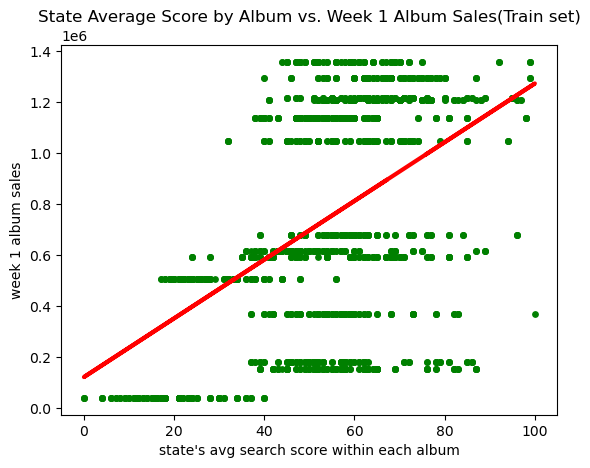

In [102]:
# Visualizing the training set results.
st_avg_wk1_sales_plot_train = plt

st_avg_wk1_sales_plot_train.scatter(X_3_train, y_3_train, color='green', s = 15)
st_avg_wk1_sales_plot_train.plot(X_3_train, y_3_predicted_train, color='red', linewidth =3)
st_avg_wk1_sales_plot_train.title("State Average Score by Album vs. Week 1 Album Sales(Train set)")
st_avg_wk1_sales_plot_train.xlabel("state's avg search score within each album")
st_avg_wk1_sales_plot_train.ylabel("week 1 album sales")
st_avg_wk1_sales_plot_train.show()

## 2d. Performance improvement after removing outliers

Notes: based on the performance improvement steps from Part 1 (using the same dependent variable), I choose to not attempt performance improvement within a linear model

# Part 3: song's "speechiness" vs. week 1 album sales

## Variable definition: Spotify's "speechiness" measure

"Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech."

## 3a. Data cleaning: df_s

In [103]:
df_s.head(20)

,song_title,album_title,song_release_date,track,acou,dance,ener,instru,live,loud,...,alb_r_yr,album_release_date,w1_sales,top_alb_count,top_alb_normal,alb_track_cnt,tvflag,sales_group,tot_streams_group,alb_genre
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.01,0.76,0.61,0.00,0.37,-4.84,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.09,0.73,0.73,0.00,0.17,-5.38,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.00,0.51,0.82,0.02,0.09,-4.79,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.00,0.55,0.89,0.00,0.39,-5.97,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.00,0.59,0.72,0.00,0.13,-5.58,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
5,Shake It Off (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,6,0.01,0.64,0.81,0.00,0.36,-5.69,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,7,0.00,0.67,0.86,0.00,0.07,-6.53,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,8,0.04,0.62,0.68,0.00,0.30,-6.44,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,9,0.04,0.59,0.67,0.00,0.11,-7.48,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,High total streams,Synth/Dream/Dance pop
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,10,0.00,0.76,0.69,0.00,0.09,-5.80,...,2023,2023-10-27,1359000,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop


In [104]:
df_s.shape

(285, 42)

In [105]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 0 to 284
Data columns (total 42 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   song_title           285 non-null    object 
 1   album_title          285 non-null    object 
 2   song_release_date    285 non-null    object 
 3   track                285 non-null    int64  
 4   acou                 285 non-null    float64
 5   dance                285 non-null    float64
 6   ener                 285 non-null    float64
 7   instru               285 non-null    float64
 8   live                 285 non-null    float64
 9   loud                 285 non-null    float64
 10  speech               285 non-null    float64
 11  temp                 285 non-null    float64
 12  val                  285 non-null    float64
 13  pop                  285 non-null    int64  
 14  dur                  285 non-null    int64  
 15  album_id             285 non-null    object 


In [106]:
df_s.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'w1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre'],
      dtype='object')

In [107]:
# rename columns for clarity

df_s.rename(columns = {'w1_sales': 'wk1_sales'}
                      , inplace=True)

In [108]:
df_s.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'wk1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre'],
      dtype='object')

In [109]:
# Check data types for relevant variables

df_s['wk1_sales'].dtype

dtype('int64')

In [110]:
# Check data types for relevant variables

df_s['speech'].dtype

dtype('float64')

In [111]:
# Convert wk1_sales to float

df_s['wk1_sales'] = df_s['wk1_sales'].astype(float)

### Missing values

In [112]:
# Check for missing values

df_s.isnull().sum()

# None found

song_title             0
album_title            0
song_release_date      0
track                  0
acou                   0
dance                  0
ener                   0
instru                 0
live                   0
loud                   0
speech                 0
temp                   0
val                    0
pop                    0
dur                    0
album_id               0
song_id                0
days                   0
tot_streams            0
last_stream_update     0
streams_n              0
top_song               0
top_song_flag          0
top_s_cnt              0
tv                     0
alb_num                0
album_announce_mo      0
alb_ann_day            0
alb_ann_yr             0
album_announce_date    0
album_release_mo       0
alb_r_day              0
alb_r_yr               0
album_release_date     0
wk1_sales              0
top_alb_count          0
top_alb_normal         0
alb_track_cnt          0
tvflag                 0
sales_group            0


### Duplicates

In [113]:
df_s_dups = df_s.duplicated()

In [114]:
df_s_dups.shape # no dups

(285,)

### Create album color dictionary for use of visuals

In [115]:
color_dict = {"DEBUT": 'mediumseagreen', "FEAR": 'goldenrod', "SPEAK":'mediumpurple', "RED": 'crimson', "1989": 'skyblue', "REP": 'k', "LOVE": 'orchid', "FOLK": 'grey', "EVER": 'chocolate', "FEARTV": 'darkgoldenrod', "REDTV": 'firebrick', "MIDN": 'darkblue', "SPEAKTV": 'indigo', "1989TV": 'steelblue'}

In [116]:
df_s['color'] = df_s['album_id'].map(color_dict)

In [117]:
df_s['color'].value_counts(dropna=False)

color
firebrick         30
darkgoldenrod     26
darkblue          23
steelblue         22
indigo            22
crimson           22
mediumpurple      20
skyblue           19
goldenrod         19
orchid            18
chocolate         17
grey              17
k                 15
mediumseagreen    15
Name: count, dtype: int64

### Extreme values checks: already checked week 1 sales, now checking for speechiness

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\3125952241.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_s['speech'], kde=True,  bins=25)


<Axes: xlabel='speech', ylabel='Density'>

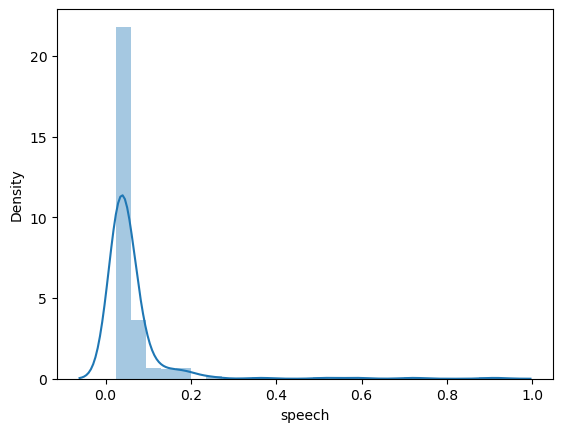

In [118]:
sns.distplot(df_s['speech'], kde=True,  bins=25)  

Observations: There are a few major outliers! I want to examine the spread of the outliers

In [119]:
df_s['speech'].describe()

count   285.00
mean      0.06
std       0.09
min       0.02
25%       0.03
50%       0.04
75%       0.06
max       0.91
Name: speech, dtype: float64

In [120]:
# Find interquartile ranges to set parameters

q1_speech = df_s['speech'].quantile(0.25)
q3_speech = df_s['speech'].quantile(0.75)
iqr_speech = q3_speech - q1_speech

# Display the results
print(f"Q1: {q1_speech}")
print(f"Q3: {q3_speech}")
print(f"IQR: {iqr_speech}")

Q1: 0.0302
Q3: 0.0558
IQR: 0.0256


In [121]:
high_out_speech = 0.0558 + (1.5*0.0256)
print(high_out_speech)

0.0942


In [122]:
high_out_speech_df = df_s[df_s['speech'] >=0.0942]

In [123]:
high_out_speech_df['album_id'].value_counts(dropna=False)

album_id
MIDN      7
REP       7
1989      5
LOVE      3
1989TV    2
EVER      2
REDTV     1
Name: count, dtype: int64

In [124]:
high_out_speech_df.shape

(27, 43)

In [125]:
high_out_speech_df

,song_title,album_title,song_release_date,track,acou,dance,ener,instru,live,loud,...,album_release_date,wk1_sales,top_alb_count,top_alb_normal,alb_track_cnt,tvflag,sales_group,tot_streams_group,alb_genre,color
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,8,0.04,0.62,0.68,0.00,0.30,-6.44,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
21,Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...,1989 (Taylor's Version)[Deluxe],10/27/2023,22,0.01,0.60,0.65,0.00,0.22,-6.91,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
50,Question...?,Midnights (The Til Dawn Edition),10/21/2022,7,0.20,0.74,0.51,0.00,0.26,-8.75,...,2022-10-21,1140000.00,54,0.14,23,False,High first week sales,High total streams,Synth/Dream/Dance pop,darkblue
51,Vigilante Shit,Midnights (The Til Dawn Edition),10/21/2022,8,0.16,0.87,0.27,0.00,0.12,-11.01,...,2022-10-21,1140000.00,54,0.14,23,False,High first week sales,High total streams,Synth/Dream/Dance pop,darkblue
56,Mastermind,Midnights (The Til Dawn Edition),10/21/2022,13,0.55,0.66,0.34,0.00,0.09,-14.04,...,2022-10-21,1140000.00,54,0.14,23,False,High first week sales,High total streams,Synth/Dream/Dance pop,darkblue
59,Paris,Midnights (The Til Dawn Edition),10/21/2022,16,0.12,0.69,0.50,0.00,0.14,-10.52,...,2022-10-21,1140000.00,54,0.14,23,False,High first week sales,Medium total streams,Synth/Dream/Dance pop,darkblue
60,High Infidelity,Midnights (The Til Dawn Edition),10/21/2022,17,0.73,0.56,0.55,0.00,0.09,-10.17,...,2022-10-21,1140000.00,54,0.14,23,False,High first week sales,Medium total streams,Synth/Dream/Dance pop,darkblue
61,Glitch,Midnights (The Til Dawn Edition),10/21/2022,18,0.32,0.68,0.45,0.00,0.11,-9.74,...,2022-10-21,1140000.00,54,0.14,23,False,High first week sales,Medium total streams,Synth/Dream/Dance pop,darkblue
62,"Would've, Could've, Should've",Midnights (The Til Dawn Edition),10/21/2022,19,0.43,0.48,0.84,0.00,0.12,-6.50,...,2022-10-21,1140000.00,54,0.14,23,False,High first week sales,Medium total streams,Synth/Dream/Dance pop,darkblue
74,We Are Never Ever Getting Back Together (Taylo...,Red (Taylor's Version),11/12/2021,8,0.03,0.57,0.69,0.00,0.07,-6.14,...,2021-11-12,369000.00,103,0.14,30,True,Low first week sales,Medium total streams,Pop rock,firebrick


Midnights and Reputation are clear album outliers here. This means that 7 out of 20 songs of Midnights and 7 out of 15 songs of reputation are outliers in the measure "speechiness". I am a bit confused on this measure because I would assume that her alternative albums- folklore and evermore, would have the highest count of speechiness. After examining the specific songs I am now understanding speechiness to be more about the percentage of a song that has Taylor singing lyrics vs. just music. 

In [126]:
alb_speech_sum = df_s.groupby('album_id')['speech'].sum()

In [127]:
alb_speech_sum

album_id
1989      3.30
1989TV    1.26
DEBUT     0.49
EVER      0.98
FEAR      0.61
FEARTV    0.98
FOLK      0.67
LOVE      1.78
MIDN      2.07
RED       0.80
REDTV     1.27
REP       1.43
SPEAK     0.69
SPEAKTV   0.85
Name: speech, dtype: float64

In [128]:
color = ['skyblue', 'steelblue', 'mediumseagreen', 'chocolate', 'goldenrod', 'darkgoldenrod', 'grey', 'orchid', 'darkblue', 'crimson', 'firebrick', 'k', 'mediumpurple', 'indigo']

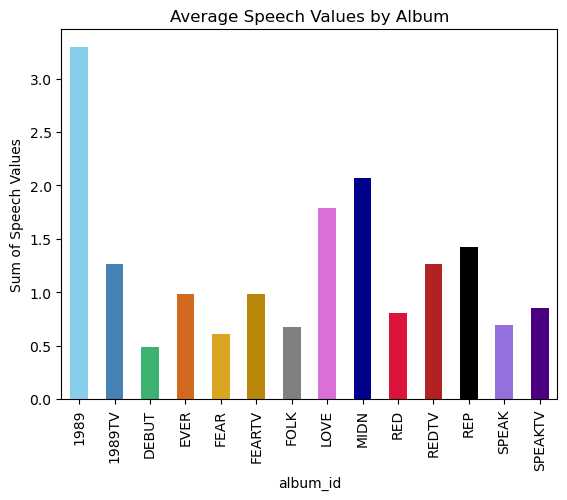

In [129]:
alb_speech_sum_bar = alb_speech_sum.plot(kind='bar', xlabel='album_id', ylabel='Sum of Speech Values', title='Average Speech Values by Album', color=color)
plt.show()

In [130]:
# Export figure

alb_speech_sum_bar.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_speech_sum_bar.png'))

Observations: Taylor's country albums tend to have less speechiness. There is a clear difference in top selling albums

Note: confused about the large difference between 1989 and 1989TV

In [131]:
speech_1989 = df_s[(df_s['album_id'] == "1989") | (df_s['album_id']== "1989TV")]

In [132]:
speech_1989

,song_title,album_title,song_release_date,track,acou,dance,ener,instru,live,loud,...,album_release_date,wk1_sales,top_alb_count,top_alb_normal,alb_track_cnt,tvflag,sales_group,tot_streams_group,alb_genre,color
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,1,0.01,0.76,0.61,0.00,0.37,-4.84,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,2,0.09,0.73,0.73,0.00,0.17,-5.38,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
2,Style (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,3,0.00,0.51,0.82,0.02,0.09,-4.79,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,4,0.00,0.55,0.89,0.00,0.39,-5.97,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,5,0.00,0.59,0.72,0.00,0.13,-5.58,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
5,Shake It Off (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,6,0.01,0.64,0.81,0.00,0.36,-5.69,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,7,0.00,0.67,0.86,0.00,0.07,-6.53,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,8,0.04,0.62,0.68,0.00,0.30,-6.44,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,9,0.04,0.59,0.67,0.00,0.11,-7.48,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,High total streams,Synth/Dream/Dance pop,steelblue
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version)[Deluxe],10/27/2023,10,0.00,0.76,0.69,0.00,0.09,-5.80,...,2023-10-27,1359000.00,1,0.08,22,True,High first week sales,Low total streams,Synth/Dream/Dance pop,steelblue


In [133]:
speech_1989.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'wk1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre', 'color'],
      dtype='object')

In [134]:
# Create a smaller subset to compare values between original and 1989TV

speech_1989_sub = speech_1989[['song_title', 'album_title', 'track', 'speech', 'dance', 'instru', 'tot_streams']]

In [135]:
speech_1989_sub = speech_1989_sub.sort_values(by='song_title')

In [136]:
speech_1989_sub

,song_title,album_title,track,speech,dance,instru,tot_streams
16,"""Slut!"" (Taylor's Version) (From The Vault)",1989 (Taylor's Version)[Deluxe],17,0.09,0.59,0.00,57165016
194,All You Had To Do Was Stay,1989 (Deluxe Edition),5,0.03,0.60,0.00,210577595
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version)[Deluxe],5,0.03,0.59,0.00,31008534
197,Bad Blood,1989 (Deluxe Edition),8,0.19,0.65,0.00,536554704
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],8,0.19,0.62,0.00,26353077
21,Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...,1989 (Taylor's Version)[Deluxe],22,0.10,0.60,0.00,17075733
191,Blank Space,1989 (Deluxe Edition),2,0.05,0.76,0.00,1591542049
1,Blank Space (Taylor's Version),1989 (Taylor's Version)[Deluxe],2,0.07,0.73,0.00,40958068
208,Blank Space - Voice Memo,1989 (Deluxe Edition),19,0.72,0.68,0.00,4717219
202,Clean,1989 (Deluxe Edition),13,0.03,0.81,0.00,185318769


The sum vs. average could be throughing it off. In generall, there are some shifts between original and TV in speechiness and danceability.

In [137]:
# Try again with means

alb_speech_avg = df_s.groupby('album_id')['speech'].mean()

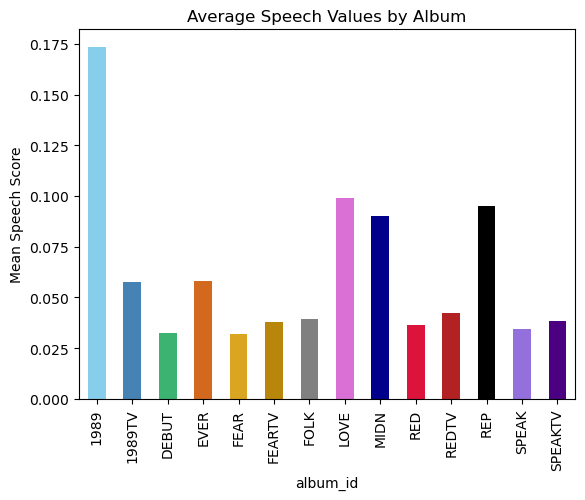

In [138]:
alb_speech_avg_bar = alb_speech_avg.plot(kind='bar', xlabel='album_id', ylabel='Mean Speech Score', title='Average Speech Values by Album', color=color)
plt.show()

In [139]:
# Save figure

alb_speech_avg_bar.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_speech_avg_bar.png'))

<Axes: ylabel='Frequency'>

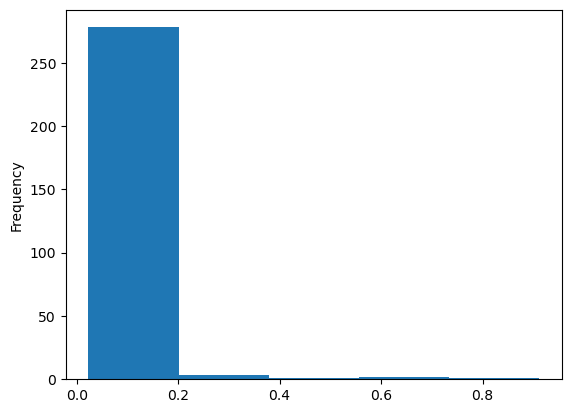

In [140]:
# Plot distribution of all speech values by count, exagerated to show majority

df_s['speech'].plot.hist(bins=5)

In [141]:
# Return to 1989 subset and find outlier songs for speech

speech_1989_sub_speech_out = speech_1989_sub.sort_values(by='speech', ascending=False)

In [142]:
speech_1989_sub_speech_out

,song_title,album_title,track,speech,dance,instru,tot_streams
207,I Wish You Would - Voice Memo,1989 (Deluxe Edition),18,0.91,0.78,0.00,4443209
208,Blank Space - Voice Memo,1989 (Deluxe Edition),19,0.72,0.68,0.00,4717219
206,I Know Places - Voice Memo,1989 (Deluxe Edition),17,0.59,0.59,0.00,5829179
7,Bad Blood (Taylor's Version),1989 (Taylor's Version)[Deluxe],8,0.19,0.62,0.00,26353077
197,Bad Blood,1989 (Deluxe Edition),8,0.19,0.65,0.00,536554704
195,Shake It Off,1989 (Deluxe Edition),6,0.17,0.65,0.00,1241474988
21,Bad Blood (feat. Kendrick Lamar) (Taylor's Ver...,1989 (Taylor's Version)[Deluxe],22,0.10,0.60,0.00,17075733
198,Wildest Dreams,1989 (Deluxe Edition),9,0.09,0.55,0.00,864865731
16,"""Slut!"" (Taylor's Version) (From The Vault)",1989 (Taylor's Version)[Deluxe],17,0.09,0.59,0.00,57165016
14,You Are In Love (Taylor's Version),1989 (Taylor's Version)[Deluxe],15,0.08,0.36,0.00,23476352


## Key finding: outliers have been identified. They are from voice memos (not songs) listed as tracks on Taylor's 1989 album. I am very curious about removing these values from entire dataframe. I imagine they could be throwing off a lot of values-including song streams. I will need to rerun correlations for any area this could have an affect.

# Part 4: Address outlier issue with spoken tracks

## Outlier removal

Need to remove "198917", "198918", "198919" song ids from 1989

In [143]:
# Check track counts for all albums prior to removal

alb_track_counts = df_s.groupby('album_id')['track'].count()

In [144]:
alb_track_counts

album_id
1989       19
1989TV     22
DEBUT      15
EVER       17
FEAR       19
FEARTV     26
FOLK       17
LOVE       18
MIDN       23
RED        22
REDTV      30
REP        15
SPEAK      20
SPEAKTV    22
Name: track, dtype: int64

In [145]:
df_s.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'wk1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre', 'color'],
      dtype='object')

In [146]:
sub_1989 = df_s.loc[df_s['album_id']== "1989"]

In [147]:
sub_1989 = sub_1989[['song_title', 'album_title', 'track', 'speech', 'song_id', 'days', 'tot_streams']]

In [148]:
sub_1989

,song_title,album_title,track,speech,song_id,days,tot_streams
190,Welcome To New York,1989 (Deluxe Edition),1,0.03,198901,3300,231290364
191,Blank Space,1989 (Deluxe Edition),2,0.05,198902,3300,1591542049
192,Style,1989 (Deluxe Edition),3,0.04,198903,3300,1024591755
193,Out Of The Woods,1989 (Deluxe Edition),4,0.04,198904,3300,306588707
194,All You Had To Do Was Stay,1989 (Deluxe Edition),5,0.03,198905,3300,210577595
195,Shake It Off,1989 (Deluxe Edition),6,0.17,198906,3300,1241474988
196,I Wish You Would,1989 (Deluxe Edition),7,0.05,198907,3300,145242025
197,Bad Blood,1989 (Deluxe Edition),8,0.19,198908,3300,536554704
198,Wildest Dreams,1989 (Deluxe Edition),9,0.09,198909,3300,864865731
199,How You Get The Girl,1989 (Deluxe Edition),10,0.05,198910,3300,159880975


In [149]:
# Remove songs "198917" "198918", "198919"
# define values to drop

songs_to_drop = ["198917", "198918", "198919"]

In [150]:
# Drop rows that contain these values

df_s_update = df_s[df_s.song_id.isin(songs_to_drop) ==False]

In [151]:
# Repeat track counts for df, 1989 should now only have 16

alb_track_counts_2 = df_s_update.groupby('album_id')['track'].count()

In [152]:
alb_track_counts_2

album_id
1989       16
1989TV     22
DEBUT      15
EVER       17
FEAR       19
FEARTV     26
FOLK       17
LOVE       18
MIDN       23
RED        22
REDTV      30
REP        15
SPEAK      20
SPEAKTV    22
Name: track, dtype: int64

Appears accurate. Want to check album specifically

In [153]:
# Check new df by making another 1989 subset

sub_1989_check2 = df_s_update.loc[df_s_update['album_id']== "1989"]

In [154]:
# Check new df by making another 1989 subset

sub_1989_check2 = sub_1989_check2[['song_title', 'album_title', 'track', 'speech', 'song_id', 'days', 'tot_streams']]

In [155]:
sub_1989_check2

,song_title,album_title,track,speech,song_id,days,tot_streams
190,Welcome To New York,1989 (Deluxe Edition),1,0.03,198901,3300,231290364
191,Blank Space,1989 (Deluxe Edition),2,0.05,198902,3300,1591542049
192,Style,1989 (Deluxe Edition),3,0.04,198903,3300,1024591755
193,Out Of The Woods,1989 (Deluxe Edition),4,0.04,198904,3300,306588707
194,All You Had To Do Was Stay,1989 (Deluxe Edition),5,0.03,198905,3300,210577595
195,Shake It Off,1989 (Deluxe Edition),6,0.17,198906,3300,1241474988
196,I Wish You Would,1989 (Deluxe Edition),7,0.05,198907,3300,145242025
197,Bad Blood,1989 (Deluxe Edition),8,0.19,198908,3300,536554704
198,Wildest Dreams,1989 (Deluxe Edition),9,0.09,198909,3300,864865731
199,How You Get The Girl,1989 (Deluxe Edition),10,0.05,198910,3300,159880975


Outliers for 1989 removed. Need to create new aggregates and add those to album_aggs and google final

## Calculate 1989 album aggregates for song information

In [156]:
# Review songs df

df_s_update.shape

(282, 43)

In [157]:
df_s_update.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'wk1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre', 'color'],
      dtype='object')

In [158]:
updated_1989_sub = df_s_update.loc[df_s_update['album_id'] == "1989"]

In [159]:
# Isolate only columns that need aggregates redone based on songs

updated_1989 = updated_1989_sub[['album_id',
                                       'track', 
                                       'acou', 
                                       'dance', 
                                       'ener', 
                                       'instru', 
                                       'live', 
                                       'loud', 
                                       'speech', 
                                       'temp', 
                                       'val',
                                       'pop', 
                                       'dur', 
                                       'days', 
                                       'tot_streams', 
                                       'streams_n',
                                       ]]

In [160]:
updated_1989.columns

Index(['album_id', 'track', 'acou', 'dance', 'ener', 'instru', 'live', 'loud',
       'speech', 'temp', 'val', 'pop', 'dur', 'days', 'tot_streams',
       'streams_n'],
      dtype='object')

In [161]:
updated_1989

,album_id,track,acou,dance,ener,instru,live,loud,speech,temp,val,pop,dur,days,tot_streams,streams_n
190,1989,1,0.03,0.79,0.63,0.00,0.30,-4.76,0.03,116.99,0.66,67,212600,3300,231290364,70087
191,1989,2,0.10,0.76,0.70,0.00,0.09,-5.41,0.05,96.00,0.57,70,231826,3300,1591542049,482285
192,1989,3,0.00,0.59,0.79,0.00,0.12,-5.59,0.04,94.93,0.49,72,231000,3300,1024591755,310482
193,1989,4,0.00,0.55,0.84,0.00,0.34,-6.94,0.04,92.01,0.34,70,235800,3300,306588707,92905
194,1989,5,0.00,0.60,0.72,0.00,0.10,-5.73,0.03,96.97,0.54,68,193293,3300,210577595,63811
195,1989,6,0.06,0.65,0.80,0.00,0.33,-5.38,0.17,160.08,0.94,68,219200,3300,1241474988,376204
196,1989,7,0.02,0.65,0.89,0.00,0.10,-5.97,0.05,118.03,0.51,71,207440,3300,145242025,44012
197,1989,8,0.09,0.65,0.79,0.00,0.20,-6.10,0.19,170.22,0.29,67,211933,3300,536554704,162592
198,1989,9,0.07,0.55,0.69,0.00,0.11,-7.42,0.09,140.00,0.47,66,220440,3300,864865731,262080
199,1989,10,0.00,0.77,0.66,0.01,0.09,-6.11,0.05,120.00,0.55,70,247533,3300,159880975,48448


In [162]:
# Aggregate relevant columns

updated_1989_aggs = updated_1989.groupby(['album_id']).agg({
                                       'track': 'count', 
                                       'acou': 'median', 
                                       'dance': 'median', 
                                       'ener': 'median', 
                                       'instru': 'median', 
                                       'live': 'median', 
                                       'loud': 'median', 
                                       'speech': 'median', 
                                       'temp': 'median', 
                                       'val': 'median',
                                       'pop': 'median', 
                                       'dur': 'median', 
                                       'days': 'median', 
                                       'tot_streams': 'median', 
                                       'streams_n': 'median'
                                     }).reset_index()

In [163]:
updated_1989_aggs

,album_id,track,acou,dance,ener,instru,live,loud,speech,temp,val,pop,dur,days,tot_streams,streams_n
0,1989,16,0.06,0.62,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,70.00,230733.00,3300.00,220933979.50,66949.00


Observations: Major improvement- speech is now 0.05 and that is almost the same as 1989TV and significantly less than with the outliers. 

### Updated album_aggs df now that have values

In [164]:
# Review current aggs df
df_s_aggs

,album_id,album_title,tv,alb_num,alb_track_cnt,w1_trad_album_sales,tot_alb_plays,alb_streams_norm,avg_song_pop,top_s_cnt,...,acou_m,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m
0,1989,1989 (Deluxe Edition),original,5.00,19.00,1297000.00,7274954212,2204522,67.16,5.00,...,0.07,0.63,0.69,0.00,0.12,-6.10,0.05,120.00,0.49,220440.00
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.00,22.00,1359000.00,1462293896,112484136,79.82,14.00,...,0.04,0.61,0.68,0.00,0.11,-6.48,0.04,118.02,0.37,224955.00
2,DEBUT,Debut,original,1.00,15.00,39000.00,1164903748,187127,63.13,1.00,...,0.09,0.58,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00
3,EVER,evermore (deluxe version),original,9.00,17.00,154500.00,3801516966,3584268,72.76,9.00,...,0.83,0.55,0.52,0.00,0.11,-10.38,0.04,122.08,0.35,245026.00
4,FEAR,Fearless Platinum Edition,original,2.00,19.00,592300.00,2590571504,473068,45.95,2.00,...,0.13,0.59,0.64,0.00,0.11,-4.99,0.03,118.98,0.31,244240.00
5,FEARTV,Fearless (Taylor's Version),Taylor's Version,10.00,26.00,179000.00,3776863210,4000902,71.62,10.00,...,0.11,0.57,0.62,0.00,0.13,-6.09,0.03,129.03,0.42,241989.50
6,FOLK,folklore (deluxe version),original,8.00,17.00,615000.00,6156253069,5119556,73.06,8.00,...,0.75,0.59,0.38,0.00,0.10,-10.06,0.04,119.58,0.40,234000.00
7,LOVE,Lover,original,7.00,18.00,679000.00,8029477011,5217324,82.61,7.00,...,0.12,0.70,0.60,0.00,0.11,-7.81,0.06,107.01,0.47,199419.50
8,MIDN,Midnights (The Til Dawn Edition),original,12.00,23.00,1140000.00,7116052008,19032283,69.61,12.00,...,0.32,0.65,0.45,0.00,0.12,-10.31,0.07,109.85,0.20,204852.00
9,RED,Red (Deluxe Edition),original,4.00,22.00,1208000.00,3204011914,794044,47.86,4.00,...,0.06,0.62,0.60,0.00,0.10,-6.78,0.03,109.99,0.48,238666.50


In [165]:
df_s_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [166]:
df_s_aggs.dtypes

album_id                object
album_title             object
tv                      object
alb_num                float64
alb_track_cnt          float64
w1_trad_album_sales    float64
tot_alb_plays            int64
alb_streams_norm         int64
avg_song_pop           float64
top_s_cnt              float64
top_alb_count          float64
top_alb_normal         float64
days_sr                float64
alb_ann_day            float64
alb_ann_yr             float64
alb_r_day              float64
alb_r_yr               float64
acou_m                 float64
dance_m                float64
ener_m                 float64
instru_m               float64
live_m                 float64
loud_m                 float64
speech_m               float64
temp_m                 float64
val_m                  float64
dur_m                  float64
dtype: object

In [167]:
# Convert album streams to float

df_s_aggs['alb_streams_norm'] = df_s_aggs['alb_streams_norm'].astype(float)

In [168]:
df_s_aggs['alb_streams_norm'].dtype

dtype('float64')

In [169]:
# Convert track count to int

df_s_aggs['alb_track_cnt'] = df_s_aggs['alb_track_cnt'].astype(int)

In [170]:
df_s_aggs['alb_track_cnt'].dtype

dtype('int32')

In [171]:
updated_1989_aggs.columns

Index(['album_id', 'track', 'acou', 'dance', 'ener', 'instru', 'live', 'loud',
       'speech', 'temp', 'val', 'pop', 'dur', 'days', 'tot_streams',
       'streams_n'],
      dtype='object')

In [172]:
# specify album_id and columns to update

album_id_to_update = "1989"

# Using names of current aggs dataframe
columns_to_update = ['alb_track_cnt', 'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m', 'tot_alb_plays', 'alb_streams_norm']

In [173]:
# Check data types
updated_1989_aggs.dtypes

album_id        object
track            int64
acou           float64
dance          float64
ener           float64
instru         float64
live           float64
loud           float64
speech         float64
temp           float64
val            float64
pop            float64
dur            float64
days           float64
tot_streams    float64
streams_n      float64
dtype: object

In [174]:
updated_1989_aggs

,album_id,track,acou,dance,ener,instru,live,loud,speech,temp,val,pop,dur,days,tot_streams,streams_n
0,1989,16,0.06,0.62,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,70.00,230733.00,3300.00,220933979.50,66949.00


In [175]:
# Specify the new values for the specified columns

new_values = [16, 0.06, 0.62, 0.71, 0.00, 0.10, -5.92, 0.05, 120.98, .49, 230733.00, 220933979.50, 66949.00]

In [176]:
# Use boolean indexing with loc to update values based on album_id

mask = df_s_aggs['album_id'] == album_id_to_update
df_s_aggs.loc[mask, columns_to_update] = new_values

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\1307887916.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '220933979.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_s_aggs.loc[mask, columns_to_update] = new_values


In [177]:
# Check for updated df

df_s_aggs

,album_id,album_title,tv,alb_num,alb_track_cnt,w1_trad_album_sales,tot_alb_plays,alb_streams_norm,avg_song_pop,top_s_cnt,...,acou_m,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m
0,1989,1989 (Deluxe Edition),original,5.00,16,1297000.00,220933979.50,66949.00,67.16,5.00,...,0.06,0.62,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.00,22,1359000.00,1462293896.00,112484136.00,79.82,14.00,...,0.04,0.61,0.68,0.00,0.11,-6.48,0.04,118.02,0.37,224955.00
2,DEBUT,Debut,original,1.00,15,39000.00,1164903748.00,187127.00,63.13,1.00,...,0.09,0.58,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00
3,EVER,evermore (deluxe version),original,9.00,17,154500.00,3801516966.00,3584268.00,72.76,9.00,...,0.83,0.55,0.52,0.00,0.11,-10.38,0.04,122.08,0.35,245026.00
4,FEAR,Fearless Platinum Edition,original,2.00,19,592300.00,2590571504.00,473068.00,45.95,2.00,...,0.13,0.59,0.64,0.00,0.11,-4.99,0.03,118.98,0.31,244240.00
5,FEARTV,Fearless (Taylor's Version),Taylor's Version,10.00,26,179000.00,3776863210.00,4000902.00,71.62,10.00,...,0.11,0.57,0.62,0.00,0.13,-6.09,0.03,129.03,0.42,241989.50
6,FOLK,folklore (deluxe version),original,8.00,17,615000.00,6156253069.00,5119556.00,73.06,8.00,...,0.75,0.59,0.38,0.00,0.10,-10.06,0.04,119.58,0.40,234000.00
7,LOVE,Lover,original,7.00,18,679000.00,8029477011.00,5217324.00,82.61,7.00,...,0.12,0.70,0.60,0.00,0.11,-7.81,0.06,107.01,0.47,199419.50
8,MIDN,Midnights (The Til Dawn Edition),original,12.00,23,1140000.00,7116052008.00,19032283.00,69.61,12.00,...,0.32,0.65,0.45,0.00,0.12,-10.31,0.07,109.85,0.20,204852.00
9,RED,Red (Deluxe Edition),original,4.00,22,1208000.00,3204011914.00,794044.00,47.86,4.00,...,0.06,0.62,0.60,0.00,0.10,-6.78,0.03,109.99,0.48,238666.50


#Successful update. Will export below with update.

## Update final google df

Handy to use from above: 

#specify album_id and columns to update

album_id_to_update = "1989"

#Using names of current aggs dataframe
columns_to_update_g_aggs = ['alb_track_cnt', 'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m', 'tot_alb_plays', 'alb_streams_norm']
       
#Specify the new values for the specified columns
new_values_g_aggs = [16, 0.06, 0.62, 0.71, 0.00, 0.10, -5.92, 0.05, 120.98, .49, 230733.00, 220933979.50, 66949.00]

In [178]:
# Review google df prior to update

df_g.shape

(3672, 93)

In [179]:
df_g.head()

,state,st_search_score_period_alb,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge,color
0,Alabama,0,Debut,DEBUT,2006-10-24,-2,69,1,original,1,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
1,Alaska,0,Debut,DEBUT,2006-10-24,-2,69,1,original,2,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
2,Arizona,8,Debut,DEBUT,2006-10-24,-2,69,1,original,3,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
3,Arkansas,46,Debut,DEBUT,2006-10-24,-2,69,1,original,4,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen
4,California,3,Debut,DEBUT,2006-10-24,-2,69,1,original,5,...,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,both,mediumseagreen


In [180]:
# Check df to see what needs updated 

df_g.columns

Index(['state', 'st_search_score_period_alb', 'album_event', 'album_id',
       'album_release_date', 'periods_from_release', 'us_search_avg',
       'alb_num_x', 'tv', 'state_num', 'alb_group_st_search_avg',
       'st_overall_search_avg', 'st_group_alb_search_avg', 'tvflag',
       'state alb popularity group', 'max_gsearch_score', 'st_top_album',
       'top_alb_num', 'min_gsearch_score', 'st_lowest_album', 'low_alb_num',
       'MIDN_avg_score', 'MIDN_sum_not_norm', 'DEBUT_avg_score', 'DEBUT_sum',
       'FEAR_avg_score', 'FEAR_sum', 'SPEAK_avg_score', 'SPEAK_sum',
       'RED_avg_score', 'RED_sum', '1989_avg_score', '1989_sum',
       'REP_avg_score', 'REP_sum', 'LOVE_avg_score', 'LOVE_sum',
       'FOLK_avg_score', 'FOLK_sum', 'EVER_avg_score', 'EVER_sum',
       'FEARTV_avg_score', 'FEARTV_sum', 'REDTV_avg_score', 'REDTV_sum',
       'SPEAKTV_avg_score', 'SPEAKTV_sum', '1989TV_avg_score',
       '1989TV_sum_not_norm', 'MIDN_sum_n', '1989TV_sum_n', 'country_sum',
       'country_

In [181]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3671
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3672 non-null   object 
 1   st_search_score_period_alb  3672 non-null   int64  
 2   album_event                 3672 non-null   object 
 3   album_id                    3672 non-null   object 
 4   album_release_date          3672 non-null   object 
 5   periods_from_release        3672 non-null   int64  
 6   us_search_avg               3672 non-null   int64  
 7   alb_num_x                   3672 non-null   int64  
 8   tv                          3672 non-null   object 
 9   state_num                   3672 non-null   int64  
 10  alb_group_st_search_avg     3672 non-null   float64
 11  st_overall_search_avg       3672 non-null   int64  
 12  st_group_alb_search_avg     3672 non-null   float64
 13  tvflag                      3672 non-n

In [182]:
# Convert data types to match prior to updated 1989 aggs.
# Will update three others that need to anyways to be saved in final df

df_g['st_overall_search_avg'] = df_g['st_overall_search_avg'].astype(float)

In [183]:
df_g['originals'] = df_g['originals'].astype(float)

In [184]:
df_g['upcoming'] = df_g['upcoming'].astype(float)

In [185]:
df_g['alb_streams_norm'] = df_g['alb_streams_norm'].astype(float)

In [186]:
df_g.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3672 entries, 0 to 3671
Data columns (total 93 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   state                       3672 non-null   object 
 1   st_search_score_period_alb  3672 non-null   int64  
 2   album_event                 3672 non-null   object 
 3   album_id                    3672 non-null   object 
 4   album_release_date          3672 non-null   object 
 5   periods_from_release        3672 non-null   int64  
 6   us_search_avg               3672 non-null   int64  
 7   alb_num_x                   3672 non-null   int64  
 8   tv                          3672 non-null   object 
 9   state_num                   3672 non-null   int64  
 10  alb_group_st_search_avg     3672 non-null   float64
 11  st_overall_search_avg       3672 non-null   float64
 12  st_group_alb_search_avg     3672 non-null   float64
 13  tvflag                      3672 non-n

In [187]:
updated_1989_aggs

,album_id,track,acou,dance,ener,instru,live,loud,speech,temp,val,pop,dur,days,tot_streams,streams_n
0,1989,16,0.06,0.62,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,70.00,230733.00,3300.00,220933979.50,66949.00


In [188]:
# specify album_id and columns to update

album_id_to_update_g_1989 = "1989"

columns_to_update_g_1989 = ['alb_track_cnt', 'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m', 'temp_m', 'val_m', 'dur_m', 'tot_alb_plays', 'alb_streams_norm']

In [189]:
# Specify new values for 1989 aggregate figures.

new_values_g_1989 = [16, 0.06, 0.62, 0.71, 0.00, 0.10, -5.92, 0.05, 120.98, .49, 230733.00, 220933979.50, 66949.00]

In [190]:
# Use boolean indexing with loc to update values based on album_id

mask2 = df_g['album_id'] == album_id_to_update_g_1989
df_g.loc[mask2, columns_to_update_g_1989] = new_values_g_1989

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\3526756084.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '220933979.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_g.loc[mask2, columns_to_update_g_1989] = new_values_g_1989


In [191]:
# Review shape

df_g.shape

(3672, 93)

In [192]:
# Select subset to check for album id

check_1989_final = df_g.loc[df_g['album_id']== '1989']

In [193]:
# Check head for matching values from above

check_1989_final.head()

,state,st_search_score_period_alb,album_event,album_id,album_release_date,periods_from_release,us_search_avg,alb_num_x,tv,state_num,...,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,_merge,color
510,Alabama,59,1989,1989,2014-10-27,-2,81,5,original,1,...,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00,both,skyblue
511,Alaska,52,1989,1989,2014-10-27,-2,81,5,original,2,...,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00,both,skyblue
512,Arizona,61,1989,1989,2014-10-27,-2,81,5,original,3,...,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00,both,skyblue
513,Arkansas,69,1989,1989,2014-10-27,-2,81,5,original,4,...,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00,both,skyblue
514,California,52,1989,1989,2014-10-27,-2,81,5,original,5,...,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00,both,skyblue


Google df updated! Will export as final version

### Check differences in correlation without outliers

In [194]:
df_s_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'w1_trad_album_sales', 'tot_alb_plays', 'alb_streams_norm',
       'avg_song_pop', 'top_s_cnt', 'top_alb_count', 'top_alb_normal',
       'days_sr', 'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr',
       'acou_m', 'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m',
       'speech_m', 'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [195]:
# Rename alb aggs columns to match df_g

df_s_aggs.rename(columns = {'w1_trad_album_sales':'wk1_sales'}, inplace=True)

In [196]:
df_s_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'wk1_sales', 'tot_alb_plays', 'alb_streams_norm', 'avg_song_pop',
       'top_s_cnt', 'top_alb_count', 'top_alb_normal', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [197]:
# Check correlations that had some relationship with speech and other issues based on 1989 outliers
# Create subset df

correl_check = df_s_aggs[['speech_m',
                      'dance_m',
                      'wk1_sales', 
                      'alb_streams_norm',
                       'tot_alb_plays',
                      'alb_track_cnt']]

In [198]:
correl_check.corr()

,speech_m,dance_m,wk1_sales,alb_streams_norm,tot_alb_plays,alb_track_cnt
speech_m,1.00,0.73,0.53,0.12,0.58,-0.29
dance_m,0.73,1.00,0.49,0.07,0.61,-0.11
wk1_sales,0.53,0.49,1.00,0.39,0.04,-0.11
alb_streams_norm,0.12,0.07,0.39,1.00,-0.20,0.19
tot_alb_plays,0.58,0.61,0.04,-0.20,1.00,0.01
alb_track_cnt,-0.29,-0.11,-0.11,0.19,0.01,1.00


In [199]:
df_s_update.columns

Index(['song_title', 'album_title', 'song_release_date', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'pop', 'dur', 'album_id', 'song_id', 'days', 'tot_streams',
       'last_stream_update', 'streams_n', 'top_song', 'top_song_flag',
       'top_s_cnt', 'tv', 'alb_num', 'album_announce_mo', 'alb_ann_day',
       'alb_ann_yr', 'album_announce_date', 'album_release_mo', 'alb_r_day',
       'alb_r_yr', 'album_release_date', 'wk1_sales', 'top_alb_count',
       'top_alb_normal', 'alb_track_cnt', 'tvflag', 'sales_group',
       'tot_streams_group', 'alb_genre', 'color'],
      dtype='object')

In [200]:
correl_check_songs_df = df_s_update [['speech', 'wk1_sales','tot_streams', 'track', 'acou',
       'dance', 'ener', 'instru', 'live', 'loud', 'speech', 'temp', 'val',
       'dur', 'days', 'tot_streams', 'streams_n', 'top_song_flag',
       'top_s_cnt', 'alb_num', 'alb_ann_day',
       'alb_ann_yr', 'alb_r_day',
       'alb_r_yr']]

In [201]:
correl_check_songs_df.corr()

,speech,wk1_sales,tot_streams,track,acou,dance,ener,instru,live,loud,...,days,tot_streams,streams_n,top_song_flag,top_s_cnt,alb_num,alb_ann_day,alb_ann_yr,alb_r_day,alb_r_yr
speech,1.00,0.19,0.22,-0.09,-0.02,0.19,-0.01,-0.02,0.02,-0.17,...,-0.16,0.22,0.03,0.10,0.10,0.10,0.21,0.16,0.06,0.16
wk1_sales,0.19,1.00,0.16,-0.07,-0.19,0.28,0.04,-0.01,0.07,-0.11,...,0.02,0.16,0.21,0.14,-0.00,-0.00,0.13,-0.04,0.48,-0.04
tot_streams,0.22,0.16,1.00,-0.34,-0.02,0.10,0.02,-0.00,-0.05,-0.05,...,-0.04,1.00,0.08,0.22,-0.08,-0.08,0.30,0.03,0.04,0.03
track,-0.09,-0.07,-0.34,1.00,0.15,-0.05,-0.08,-0.04,-0.04,-0.16,...,-0.16,-0.34,-0.02,-0.29,0.19,0.19,-0.04,0.16,-0.09,0.16
acou,-0.02,-0.19,-0.02,0.15,1.00,-0.13,-0.69,0.16,-0.15,-0.70,...,-0.14,-0.02,-0.08,-0.08,0.05,0.05,0.13,0.14,0.05,0.14
dance,0.19,0.28,0.10,-0.05,-0.13,1.00,0.05,-0.07,-0.02,-0.02,...,-0.02,0.10,0.02,0.07,-0.00,-0.00,0.13,0.01,0.11,0.01
ener,-0.01,0.04,0.02,-0.08,-0.69,0.05,1.00,-0.07,0.19,0.77,...,0.13,0.02,0.03,0.09,-0.06,-0.06,-0.24,-0.13,-0.06,-0.13
instru,-0.02,-0.01,-0.00,-0.04,0.16,-0.07,-0.07,1.00,-0.04,-0.19,...,-0.07,-0.00,-0.01,0.06,0.06,0.06,0.06,0.06,-0.00,0.06
live,0.02,0.07,-0.05,-0.04,-0.15,-0.02,0.19,-0.04,1.00,0.23,...,0.07,-0.05,-0.03,-0.06,-0.03,-0.03,-0.00,-0.07,0.02,-0.07
loud,-0.17,-0.11,-0.05,-0.16,-0.70,-0.02,0.77,-0.19,0.23,1.00,...,0.30,-0.05,-0.04,0.03,-0.21,-0.21,-0.41,-0.30,-0.15,-0.30


In [202]:
# Rename album aggs df for clarity

final_alb_aggs = df_s_aggs

# Key observations after outlier removal: 
## Within album aggs dataframe (isolates album info vs. search repeats)
speech_m has similar correlation with week1_sales as it did prior (0.53)
Speech has a lower correlation between speech_m and total_alb_plays (0.58 now vs. was 0.73)
The median speech of an album is still the strongest music characteristic relationship to wk1_sales, and a close second to measuring total album plays (0.58) (dance is number one at 0.61)

## Within the song df
speech score for a song and wk1_sales is only 0.19 
This is less accurate because the sales figures repeat for all the songs within each album
Using the album median speech score v. album sales is more accurate

# Part 3 continued: Updating to speech vs.  total album plays

This is because speech has a stronger relationship with album plays and is one of the top musical characteristics for that specific performance measure.

## Review variable now that outliers removed

In [203]:
final_alb_aggs.shape

(14, 27)

In [204]:
final_alb_aggs.head()

,album_id,album_title,tv,alb_num,alb_track_cnt,wk1_sales,tot_alb_plays,alb_streams_norm,avg_song_pop,top_s_cnt,...,acou_m,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m
0,1989,1989 (Deluxe Edition),original,5.00,16,1297000.00,220933979.50,66949.00,67.16,5.00,...,0.06,0.62,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.00,22,1359000.00,1462293896.00,112484136.00,79.82,14.00,...,0.04,0.61,0.68,0.00,0.11,-6.48,0.04,118.02,0.37,224955.00
2,DEBUT,Debut,original,1.00,15,39000.00,1164903748.00,187127.00,63.13,1.00,...,0.09,0.58,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00
3,EVER,evermore (deluxe version),original,9.00,17,154500.00,3801516966.00,3584268.00,72.76,9.00,...,0.83,0.55,0.52,0.00,0.11,-10.38,0.04,122.08,0.35,245026.00
4,FEAR,Fearless Platinum Edition,original,2.00,19,592300.00,2590571504.00,473068.00,45.95,2.00,...,0.13,0.59,0.64,0.00,0.11,-4.99,0.03,118.98,0.31,244240.00


In [205]:
final_alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'wk1_sales', 'tot_alb_plays', 'alb_streams_norm', 'avg_song_pop',
       'top_s_cnt', 'top_alb_count', 'top_alb_normal', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [206]:
# Check stats for relevant variables

final_alb_aggs['speech_m'].describe()

count   14.00
mean     0.04
std      0.01
min      0.03
25%      0.03
50%      0.04
75%      0.05
max      0.07
Name: speech_m, dtype: float64

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\1075900303.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_alb_aggs['speech_m'], bins=25)


<Axes: xlabel='speech_m', ylabel='Density'>

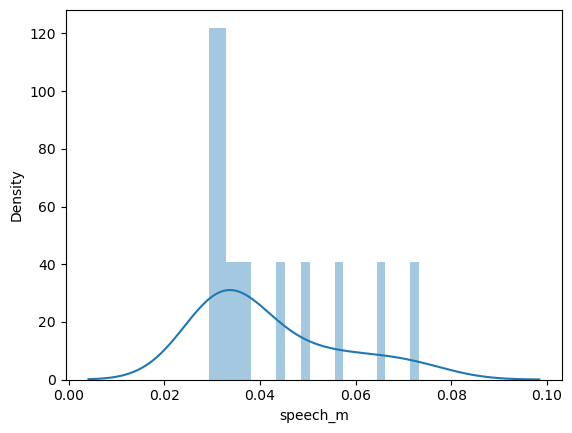

In [207]:
sns.distplot(final_alb_aggs['speech_m'], bins=25)  

Observations: The majority of albums have a speechiness score under 0.04

In [208]:
final_alb_aggs.columns

Index(['album_id', 'album_title', 'tv', 'alb_num', 'alb_track_cnt',
       'wk1_sales', 'tot_alb_plays', 'alb_streams_norm', 'avg_song_pop',
       'top_s_cnt', 'top_alb_count', 'top_alb_normal', 'days_sr',
       'alb_ann_day', 'alb_ann_yr', 'alb_r_day', 'alb_r_yr', 'acou_m',
       'dance_m', 'ener_m', 'instru_m', 'live_m', 'loud_m', 'speech_m',
       'temp_m', 'val_m', 'dur_m'],
      dtype='object')

In [209]:
## Add color to album aggs df
#Create dictionary

color_dict = {"DEBUT": 'mediumseagreen', "FEAR": 'goldenrod', "SPEAK":'mediumpurple', "RED": 'crimson', "1989": 'skyblue', "REP": 'k', "LOVE": 'orchid', "FOLK": 'grey', "EVER": 'chocolate', "FEARTV": 'darkgoldenrod', "REDTV": 'firebrick', "MIDN": 'darkblue', "SPEAKTV": 'indigo', "1989TV": 'steelblue'}

In [210]:
# Map dictionary onto df as new column

final_alb_aggs['color'] = final_alb_aggs['album_id'].map(color_dict)

In [211]:
# Check update

final_alb_aggs

,album_id,album_title,tv,alb_num,alb_track_cnt,wk1_sales,tot_alb_plays,alb_streams_norm,avg_song_pop,top_s_cnt,...,dance_m,ener_m,instru_m,live_m,loud_m,speech_m,temp_m,val_m,dur_m,color
0,1989,1989 (Deluxe Edition),original,5.00,16,1297000.00,220933979.50,66949.00,67.16,5.00,...,0.62,0.71,0.00,0.10,-5.92,0.05,120.98,0.49,230733.00,skyblue
1,1989TV,1989 (Taylor's Version)[Deluxe],Taylor's Version,14.00,22,1359000.00,1462293896.00,112484136.00,79.82,14.00,...,0.61,0.68,0.00,0.11,-6.48,0.04,118.02,0.37,224955.00,steelblue
2,DEBUT,Debut,original,1.00,15,39000.00,1164903748.00,187127.00,63.13,1.00,...,0.58,0.67,0.00,0.13,-4.93,0.03,115.03,0.43,213053.00,mediumseagreen
3,EVER,evermore (deluxe version),original,9.00,17,154500.00,3801516966.00,3584268.00,72.76,9.00,...,0.55,0.52,0.00,0.11,-10.38,0.04,122.08,0.35,245026.00,chocolate
4,FEAR,Fearless Platinum Edition,original,2.00,19,592300.00,2590571504.00,473068.00,45.95,2.00,...,0.59,0.64,0.00,0.11,-4.99,0.03,118.98,0.31,244240.00,goldenrod
5,FEARTV,Fearless (Taylor's Version),Taylor's Version,10.00,26,179000.00,3776863210.00,4000902.00,71.62,10.00,...,0.57,0.62,0.00,0.13,-6.09,0.03,129.03,0.42,241989.50,darkgoldenrod
6,FOLK,folklore (deluxe version),original,8.00,17,615000.00,6156253069.00,5119556.00,73.06,8.00,...,0.59,0.38,0.00,0.10,-10.06,0.04,119.58,0.40,234000.00,grey
7,LOVE,Lover,original,7.00,18,679000.00,8029477011.00,5217324.00,82.61,7.00,...,0.70,0.60,0.00,0.11,-7.81,0.06,107.01,0.47,199419.50,orchid
8,MIDN,Midnights (The Til Dawn Edition),original,12.00,23,1140000.00,7116052008.00,19032283.00,69.61,12.00,...,0.65,0.45,0.00,0.12,-10.31,0.07,109.85,0.20,204852.00,darkblue
9,RED,Red (Deluxe Edition),original,4.00,22,1208000.00,3204011914.00,794044.00,47.86,4.00,...,0.62,0.60,0.00,0.10,-6.78,0.03,109.99,0.48,238666.50,crimson


In [212]:
# Define color to use in viz

color = ['skyblue', 'steelblue', 'mediumseagreen', 'chocolate', 'goldenrod', 'darkgoldenrod', 'grey', 'orchid', 'darkblue', 'crimson', 'firebrick', 'k', 'mediumpurple', 'indigo']

Text(0.5, 1.0, 'Album Song Speechiness (Median)')

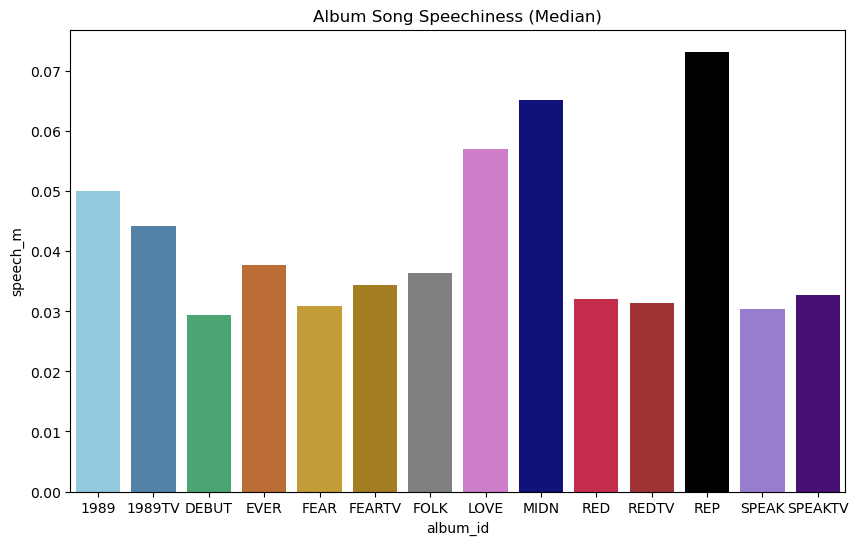

In [213]:
# Create a bar chart to see difs after outliers gone 

plt.figure(figsize=(10, 6))
alb_speech_m_bar = sns.barplot(x='album_id', y='speech_m', data=final_alb_aggs, hue='album_id', palette=color)
plt.title("Album Song Speechiness (Median)")

In [214]:
# Export figure

alb_speech_m_bar.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_speech_m_bar.png'))

Observations: it is interesting that REP has the highest speechiness since I used average REP state search score in another correlation analysis.

## Extreme values check and explore "total album plays"

C:\Users\leobs\AppData\Local\Temp\ipykernel_6580\1017908895.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_alb_aggs['tot_alb_plays'], bins=25)


<Axes: xlabel='tot_alb_plays', ylabel='Density'>

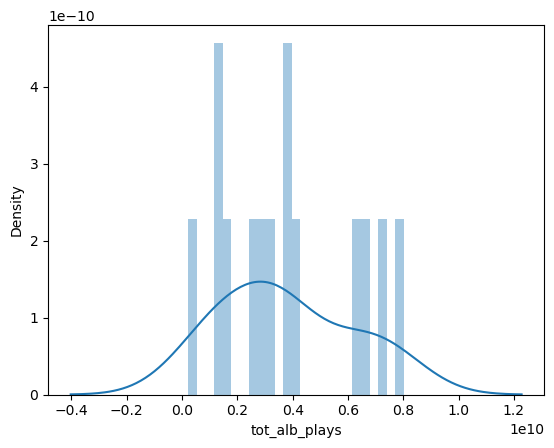

In [215]:
sns.distplot(final_alb_aggs['tot_alb_plays'], bins=25)  

Observations: There appears to be clusters associated with album plays. I will continue with linear regression and if needed explore these variables with k-means clustering in next notebook.

In [216]:
final_alb_aggs['tot_alb_plays'].describe()

count           14.00
mean    3760182056.11
std     2400394840.18
min      220933979.50
25%     1790972673.50
50%     3490437562.00
75%     5632923805.25
max     8029477011.00
Name: tot_alb_plays, dtype: float64

## 3b.Data prep for regression analysis

### Variables: album's median song speechiness score and week 1 album sales 
Within continuous variables, this is the strongest relationship between a song characteristic and album performance measures. 

Can use hue to also see trends for albums within this relationship.

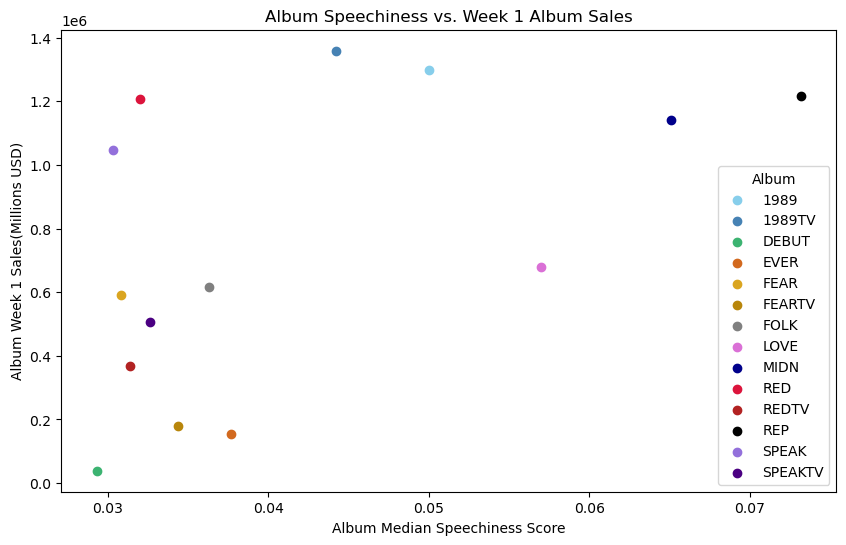

In [217]:
# Create a scatter plot using matplotlib

# Create a figure object
alb_spech_vs_sales_scatter, ax = plt.subplots(figsize=(10, 6))

for album_id, color in zip(final_alb_aggs['album_id'].unique(), final_alb_aggs['color'].unique()):
    subset = final_alb_aggs[final_alb_aggs['album_id'] == album_id]
    ax.scatter(subset['speech_m'], subset['wk1_sales'], label=album_id, color=color, marker='o')

# Set labels and title
ax.set_title("Album Speechiness vs. Week 1 Album Sales")
ax.set_xlabel("Album Median Speechiness Score")
ax.set_ylabel("Album Week 1 Sales(Millions USD)")
ax.legend(title='Album')  # Add legend to distinguish album_id

# Show the plot
plt.show()

In [218]:
# Save figure

alb_spech_vs_sales_scatter.figure.savefig(os.path.join(path, '03 Analysis', 'Visualizations', 'alb_spech_vs_sales_scatter.png'))

In [219]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X_speech = df_s_aggs['speech_m'].values.reshape(-1,1)
y_speech = df_s_aggs['wk1_sales'].values.reshape(-1,1)

In [220]:
X_speech

array([[0.05   ],
       [0.0442 ],
       [0.0293 ],
       [0.0377 ],
       [0.0308 ],
       [0.03435],
       [0.0363 ],
       [0.057  ],
       [0.0651 ],
       [0.032  ],
       [0.03135],
       [0.0732 ],
       [0.03035],
       [0.03265]])

In [221]:
y_speech

array([[1297000.],
       [1359000.],
       [  39000.],
       [ 154500.],
       [ 592300.],
       [ 179000.],
       [ 615000.],
       [ 679000.],
       [1140000.],
       [1208000.],
       [ 369000.],
       [1216000.],
       [1047000.],
       [ 507000.]])

In [222]:
# Split data into a training set and a test set.

X_train_speech, X_test_speech, y_train_speech, y_test_speech = train_test_split(X_speech, y_speech, test_size=0.3, random_state=0)

## 3c. Regression analysis 

In [223]:
# Create a regression object.

regression_speech = LinearRegression() 

In [224]:
# Fit the regression object onto the training set.

regression_speech.fit(X_train_speech, y_train_speech)

LinearRegression()

In [225]:
# Predict the values of y using X.

y_predicted_speech = regression_speech.predict(X_test_speech)

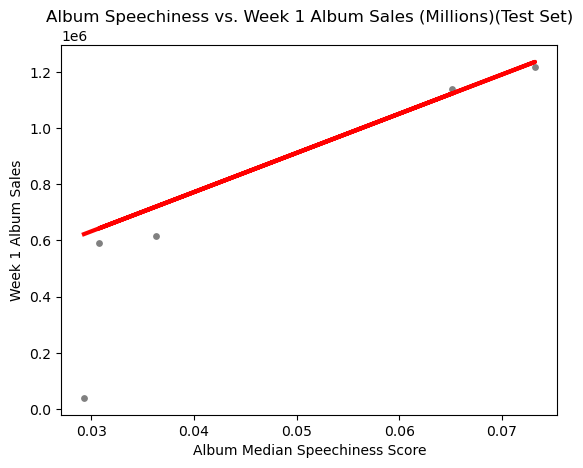

In [226]:
# Create a plot that shows the regression line from the model on the test set.

plot_test_speech = plt
plot_test_speech.scatter(X_test_speech, y_test_speech, color='gray', s = 15)
plot_test_speech.plot(X_test_speech, y_predicted_speech, color='red', linewidth =3)
plot_test_speech.title("Album Speechiness vs. Week 1 Album Sales (Millions)(Test Set)")
plot_test_speech.xlabel("Album Median Speechiness Score")
plot_test_speech.ylabel("Week 1 Album Sales")
plot_test_speech.show()

In [227]:
# Create objects that contain the model summary statistics.

rmse_speech = mean_squared_error(y_test_speech, y_predicted_speech) 
r2_speech = r2_score(y_test_speech, y_predicted_speech) 

In [228]:
# Print the model summary statistics to evaluate model performance

print('Slope:' ,regression_speech.coef_)
print('Mean squared error: ', rmse_speech)
print('R2 score: ', r2_speech)

Slope: [[13966869.54933432]]
Mean squared error:  70881597185.66978
R2 score:  0.6120363522587842


While this is a small sample size, the R2 score of 0.61 shows a fairly good model fit in terms of accounting for variance.  However, the mean squared error is enormouse 70,881,597,185. This is way more than any value in the data. Choosing not to continue with this regression analysis due to poor scores.

In [229]:
y_predicted_speech

array([[1122207.91938974],
       [ 719962.07636892],
       [ 643144.29384758],
       [1235339.56273935],
       [ 622193.98952358]])

In [230]:
# Create a dataframe comparing the actual and predicted values of y.

data_speech = pd.DataFrame({'Actual': y_test_speech.flatten(), 'Predicted': y_predicted_speech.flatten()})
data_speech.head(30)

,Actual,Predicted
0,1140000.00,1122207.92
1,615000.00,719962.08
2,592300.00,643144.29
3,1216000.00,1235339.56
4,39000.00,622193.99


A bit confused, because the values are not very far off even though the Mean squared error was 70881597185.66978. These ranges would work for marketting because they are within ballpark relatively.

## Compare how regression fits training set

In [231]:
# Predict the X train

y_predicted_train_speech = regression_speech.predict(X_train_speech) 

In [232]:
rmse_speech2 = mean_squared_error(y_train_speech, y_predicted_train_speech)
r2_speech2 = r2_score(y_train_speech, y_predicted_train_speech)

In [233]:
print('Slope:' ,regression_speech.coef_)
print('Mean squared error: ', rmse_speech2)
print('R2 score: ', r2_speech2)

Slope: [[13966869.54933432]]
Mean squared error:  190853205297.4029
R2 score:  0.07537488625650823


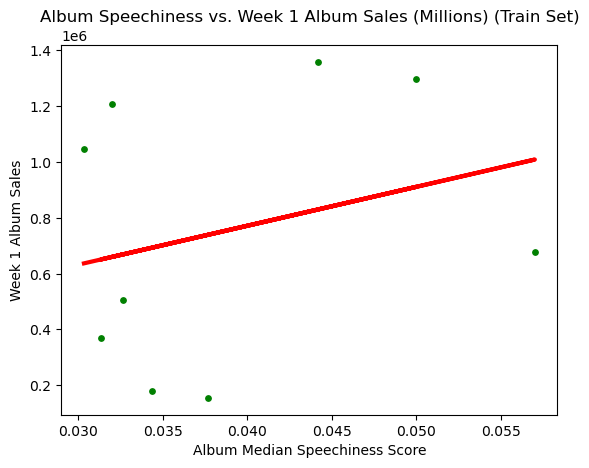

In [235]:
# Visualizing the training set results.

plot_test_speech = plt
plot_test_speech.scatter(X_train_speech, y_train_speech, color='green', s = 15)
plot_test_speech.plot(X_train_speech, y_predicted_train_speech, color='red', linewidth =3)
plot_test_speech.title("Album Speechiness vs. Week 1 Album Sales (Millions) (Train Set)")
plot_test_speech.xlabel("Album Median Speechiness Score")
plot_test_speech.ylabel("Week 1 Album Sales")
plot_test_speech.show()

## 3d. Performance improvement after removing outliers

Choice to not improve performance. This is because of small dataframe size as well as clusters vs. major outliers. Linear regression is not the best measure of success because of only having 14 values. 

# Overall Observations

#### Album group state google search avg vs. Week 1 traditional album sales
The r2 score of 0.37 showed that the linear model was not a great fit for this relationship.
When I removed the outliers (average scores under 50, which meant DEBUT and EVERMORE albums), it only got worse.
Curious to explore this within cluster analysis.

#### State group album specific google search avg vs. Week 1 trad album sales
The R2 score was only 0.207... and therefore a linear model is not a good fit. Could explore with cluster analysis.

#### Song's speechiness score and total album plays (0.58 corr coef)
This was the new focus after updating the outliers from 1989. 
While this is a small sample size, the R2 score of 0.61 shows a good account for variance, yet the Mean squared error was enormous. This model was not a good fit.


## Choice to focus on first relationship between album group state google search avg vs. Week 1 traditional album sales in addition to the prior linear analysis of REP_avg_score and st_overall_search_avg

# Data export

In [236]:
# Export google df with updated data types for week one sales (float), color dictionary,  and removed outlier songs

df_g.to_csv(os.path.join(path, '02 Manipulated Data', 'final_goog_2.csv'))

In [237]:
# Export song df with updated data types for week one sales (float), color dictionary and removed outlier songs

df_s_update.to_csv(os.path.join(path, '02 Manipulated Data', 'final_song_df.csv'))

In [238]:
# Export album_aggs df with updated data types for week one sales (float), color dictionary and removed outlier songs

final_alb_aggs.to_csv(os.path.join(path, '02 Manipulated Data', 'final_alb_aggs.csv'))